In [14]:
import pandas as pd 
import numpy as np
import os
import re
import emoji
import unicodedata
import seaborn as sns
from sklearn.model_selection import train_test_split # pip install scikit-learn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from PIL import Image 
import cufflinks as cf
import stylecloud
from stylecloud import gen_stylecloud 
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
import seaborn as sns

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN#Reduccion Dimensionalidad
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
import plotly.express as px
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [15]:
users=pd.read_csv("sd254_users.csv")
users

Person  Current Age  Retirement Age  Birth Year  Birth Month   
0        Hazel Robinson           53              66        1966           11  \
1            Sasha Sadr           53              68        1966           12   
2            Saanvi Lee           81              67        1938           11   
3         Everlee Clark           63              63        1957            1   
4         Kyle Peterson           43              70        1976            9   
...                 ...          ...             ...         ...          ...   
1995       Jose Faraday           32              70        1987            7   
1996  Ximena Richardson           62              65        1957           11   
1997     Annika Russell           47              67        1973            1   
1998        Juelz Roman           66              60        1954            2   
1999       Kenia Harris           21              60        1998           11   

      Gender                   Address  Apartment           City State   
0     Female             462 Rose Lane        NaN       La Verne    CA  \
1     Female    3606 Federal Boulevard        NaN    Little Neck    NY   
2     Female           766 Third Drive        NaN    West Covina    CA   
3     Female          3 Madison Street        NaN       New York    NY   
4       Male  9620 Valley Stream Drive        NaN  San Francisco    CA   
...      ...                       ...        ...            ...   ...   
1995    Male       6577 Lexington Lane        9.0       Freeport    NY   
1996  Female               2 Elm Drive      955.0   Independence    KY   
1997  Female       276 Fifth Boulevard        NaN      Elizabeth    NJ   
1998    Male      259 Valley Boulevard        NaN      Camp Hill    PA   
1999  Female     472 Ocean View Street        NaN      Merrimack    NH   

      Zipcode  Latitude  Longitude Per Capita Income - Zipcode   
0       91750     34.15    -117.76                      $29278  \
1       11363     40.76     -73.74                      $37891   
2       91792     34.02    -117.89                      $22681   
3       10069     40.71     -73.99                     $163145   
4       94117     37.76    -122.44                      $53797   
...       ...       ...        ...                         ...   
1995    11520     40.65     -73.58                      $23550   
1996    41051     38.95     -84.54                      $24218   
1997     7201     40.66     -74.19                      $15175   
1998    17011     40.24     -76.92                      $25336   
1999     3054     42.86     -71.48                      $32325   

     Yearly Income - Person Total Debt  FICO Score  Num Credit Cards  
0                    $59696    $127613         787                 5  
1                    $77254    $191349         701                 5  
2                    $33483       $196         698                 5  
3                   $249925    $202328         722                 4  
4                   $109687    $183855         675                 1  
...                     ...        ...         ...               ...  
1995                 $48010     $87837         703                 3  
1996                 $49378    $104480         740                 4  
1997                 $30942     $71066         779                 3  
1998                 $54654     $27241         618                 1  
1999                 $65909    $181261         673                 2  

[2000 rows x 18 columns]

In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Person                       2000 non-null   object 
 1   Current Age                  2000 non-null   int64  
 2   Retirement Age               2000 non-null   int64  
 3   Birth Year                   2000 non-null   int64  
 4   Birth Month                  2000 non-null   int64  
 5   Gender                       2000 non-null   object 
 6   Address                      2000 non-null   object 
 7   Apartment                    528 non-null    float64
 8   City                         2000 non-null   object 
 9   State                        2000 non-null   object 
 10  Zipcode                      2000 non-null   int64  
 11  Latitude                     2000 non-null   float64
 12  Longitude                    2000 non-null   float64
 13  Per Capita Income 

In [17]:
cards=pd.read_csv("sd254_cards.csv")
cards

User  CARD INDEX  Card Brand        Card Type       Card Number   
0        0           0        Visa            Debit  4344676511950444  \
1        0           1        Visa            Debit  4956965974959986   
2        0           2        Visa            Debit  4582313478255491   
3        0           3        Visa           Credit  4879494103069057   
4        0           4  Mastercard  Debit (Prepaid)  5722874738736011   
...    ...         ...         ...              ...               ...   
6141  1997           1        Amex           Credit   300609782832003   
6142  1997           2        Visa           Credit  4718517475996018   
6143  1998           0  Mastercard           Credit  5929512204765914   
6144  1999           0  Mastercard            Debit  5589768928167462   
6145  1999           1        Visa           Credit  4994011318343994   

      Expires  CVV Has Chip  Cards Issued Credit Limit Acct Open Date   
0     12/2022  623      YES             2       $24295        09/2002  \
1     12/2020  393      YES             2       $21968        04/2014   
2     02/2024  719      YES             2       $46414        07/2003   
3     08/2024  693       NO             1       $12400        01/2003   
4     03/2009   75      YES             1          $28        09/2008   
...       ...  ...      ...           ...          ...            ...   
6141  01/2024  663      YES             1        $6900        11/2000   
6142  01/2021  492      YES             2        $5700        04/2012   
6143  08/2020  237       NO             2        $9200        02/2012   
6144  01/2020  630      YES             1       $28074        01/2020   
6145  12/2020  120      YES             1       $14400        05/2017   

      Year PIN last Changed Card on Dark Web  
0                      2008               No  
1                      2014               No  
2                      2004               No  
3                      2012               No  
4                      2009               No  
...                     ...              ...  
6141                   2013               No  
6142                   2012               No  
6143                   2012               No  
6144                   2020               No  
6145                   2017               No  

[6146 rows x 13 columns]

In [18]:
cards['Card Type'].unique()

array(['Debit', 'Credit', 'Debit (Prepaid)'], dtype=object)

In [19]:
base=pd.read_csv("Base_.csv")
base

Unnamed: 0  User  Card  Year  Month  Day   Time   Amount   
0            4318387   360     0  2010      7   16  10:40  $292.00  \
1             546766    42     0  2004      5    3  08:00   $57.91   
2            6622799   553     4  2011     11    1  07:53   $73.30   
3           14859522  1221     0  2008      9   21  20:58   $70.65   
4            4119406   338     2  2017      5   29  12:03   $11.43   
...              ...   ...   ...   ...    ...  ...    ...      ...   
12193445    16056876  1305     3  2009      6   28  08:16   $34.14   
12193446    10398434   873     4  2015      3    8  15:10  $130.23   
12193447     9996321   842     3  2019      2   11  12:30   $14.85   
12193448    22886248  1876     3  2016      8    5  14:30    $4.71   
12193449     1342965   108     0  2015      2   18  09:21    $2.41   

                   Use Chip        Merchant Name Merchant City Merchant State   
0         Swipe Transaction -6161792371494728879    Grove City             OH  \
1         Swipe Transaction  5591398449792412450       Gilbert             AZ   
2         Swipe Transaction  -303858256154265716  Grahamsville             NY   
3         Swipe Transaction  4722913068560264812         Keene             TX   
4         Swipe Transaction -5315319435381474556     Lewistown             PA   
...                     ...                  ...           ...            ...   
12193445  Swipe Transaction  6392452834355287969   Clarksville             IN   
12193446  Swipe Transaction  -870305087491774821    Clearwater             FL   
12193447   Chip Transaction  5205099864768539121  Indianapolis             IN   
12193448   Chip Transaction  6135208568923449408         Bronx             NY   
12193449  Swipe Transaction -3643912571797376967   Westminster             CA   

              Zip   MCC Errors? Is Fraud?  
0         43123.0  3389     NaN        No  
1         85233.0  7922     NaN        No  
2         12740.0  5251     NaN        No  
3         76059.0  5411     NaN        No  
4         17044.0  5411     NaN        No  
...           ...   ...     ...       ...  
12193445  47129.0  5300     NaN        No  
12193446  33761.0  8041     NaN        No  
12193447  46222.0  5812     NaN        No  
12193448  10460.0  9402     NaN        No  
12193449  92683.0  5812     NaN        No  

[12193450 rows x 16 columns]

In [20]:
#base=pd.read_csv("User0_credit_card_transactions.csv")
#base

In [21]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12193450 entries, 0 to 12193449
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   User            int64  
 2   Card            int64  
 3   Year            int64  
 4   Month           int64  
 5   Day             int64  
 6   Time            object 
 7   Amount          object 
 8   Use Chip        object 
 9   Merchant Name   int64  
 10  Merchant City   object 
 11  Merchant State  object 
 12  Zip             float64
 13  MCC             int64  
 14  Errors?         object 
 15  Is Fraud?       object 
dtypes: float64(1), int64(8), object(7)
memory usage: 1.5+ GB


In [22]:
# variables  relacionadas con el total 
base['Amount_float'] = pd.to_numeric(base['Amount'].str.replace('$', ''), errors='coerce') #pasar amount a float 
quantile=base['Amount_float'].quantile(.90) #seleccionar el valor del 10 % valores mas altos
base['compras_caras']=base['Amount_float'].map(lambda x: 1 if x>quantile else 0) #1 si corresponde a una compra muy cara

# variables de tiempo 
base['Date_Time'] = pd.to_datetime(base['Year'].astype(str) + '-' + base['Month'].astype(str) + '-' + base['Day'].astype(str) + ' ' + base['Time'].astype(str)) #formato de fecha 
base['day_of_week']=pd.to_datetime(base['Date_Time']).dt.dayofweek #que me de el dia de la semana 
base['is_weekend']=pd.to_datetime(base['Date_Time']).dt.dayofweek.isin([5,6])*1 #1 si es fin de semana
base['hour']=pd.to_datetime(base['Date_Time']).dt.hour



#Fraude o devolucon
base['Fraud']=base['Is Fraud?'].map(lambda x: 0 if x=='No' else 1)
base['is_return']=base['Amount_float'].map(lambda x: 1 if x< 0 else 0)


In [23]:
#agrupando 
agg_col = 'User'
agg_funcs = {
    'Amount_float': ['count','sum', 'min', 'max', 'mean','median' ],
    'compras_caras':'sum',
    'Day':[ 'min', 'max', 'mean','median' ],
    'day_of_week':[ 'min', 'max', 'mean','median' ],    
    'Month':[ 'min', 'max', 'mean','median' ],
    'hour':[ 'min', 'max', 'mean','median' ],
    'is_weekend':'sum', 
    'Fraud':'sum',
    'is_return':'sum'
  


    
    
    
}

df = base.groupby(agg_col).agg(agg_funcs)
df['diferent_cities']=base.groupby(agg_col)['Merchant City'].nunique()


In [24]:
df.columns = [f"{col[0]}_{col[1]}" for col in df.columns]


In [25]:
df['Fraud_rate']=df['Fraud_sum']/df['Amount_float_count']
df['is_weekend_rate']=df['is_weekend_sum']/df['Amount_float_count']
df['is_return_rate']=df['is_return_sum']/df['Amount_float_count']
df['compras_caras_rate']=df['compras_caras_sum']/df['Amount_float_count']


In [26]:
# pasando a float los valores numericos
users['Per Capita Income - Zipcode_float'] = pd.to_numeric(users['Per Capita Income - Zipcode'].str.replace('$', ''), errors='coerce')
users['Yearly Income - Person_float'] = pd.to_numeric(users['Yearly Income - Person'].str.replace('$', ''), errors='coerce')
users['Total Debt_float'] = pd.to_numeric(users['Total Debt'].str.replace('$', ''), errors='coerce')

In [27]:
df=pd.merge(df,users, left_on='User', right_index=True, how='left')


In [28]:
# Transacciones promedio por año
aux = base.groupby(['User', 'Year']).agg(
    TranAnio = ('User','count')).reset_index()

aux = aux.groupby(['User']).agg(
    TranPromAnio = ('TranAnio', 'mean')).reset_index()
    
# Agregamos a los datos
df = df.merge(aux, on= 'User', how='left')

In [29]:
# Variable auxiliar anio-mes 
base['YM'] = base['Year'].astype(str) + base['Month'].astype(str)

# Transacciones promedio por mes
aux = base.groupby(['User', 'YM']).agg(
    TranMes = ('User','count')).reset_index()

aux = aux.groupby(['User']).agg(
    TranPromMes = ('TranMes', 'mean')).reset_index()
    
# Agregamos a los datos
df = df.merge(aux, on= 'User', how='left')

In [30]:
# Variable auxiliar anio-mes-dia
base['YMD'] = base['Year'].astype(str) + base['Month'].astype(str) + base['Day'].astype(str)

# Transacciones promedio por año
aux = base.groupby(['User', 'YMD']).agg(
    TranDia = ('User','count')).reset_index()

aux = aux.groupby(['User']).agg(
    TranPromDia = ('TranDia', 'mean')).reset_index()
    
# Agregamos a los datos
df = df.merge(aux, on= 'User', how='left')

In [31]:
# Tarjeta favorita del cliente
#aux = base.groupby('User')['Card'].agg(pd.Series.mode).reset_index().rename(columns={'Card':'TarjetaFav'})

# Agregamos a los datos
#df = df.merge(aux, on= 'User', how='left')

In [32]:
# Forma en que los clientes realizan sus transacciones
#aux = pd.pivot_table(base[base['Amount_float'] > 0], values='Day', index='User', columns='Use Chip', aggfunc='count', fill_value=0).reset_index()
#aux = aux.fillna(0)

# Agregamos a los datos
#df = df.merge(aux, on= 'User', how='left')

In [33]:
# Cambiamos el tipo de dato de la columna
#df['TarjetaFav'] = pd.to_numeric(df['TarjetaFav'],errors='coerce', downcast='integer')

# Pegaremos el tipo de la tarjeta que más ocupa
#aux = cards[['User', 'TarjetaFav', 'Card Type']].rename(columns={'Card Type':'Tipo Tarjeta Fav'})

# Agregamos a los datos
#df = df.merge(aux, on= ['User', 'TarjetaFav'], how='left')

In [34]:
df=df.drop('User',axis=1)

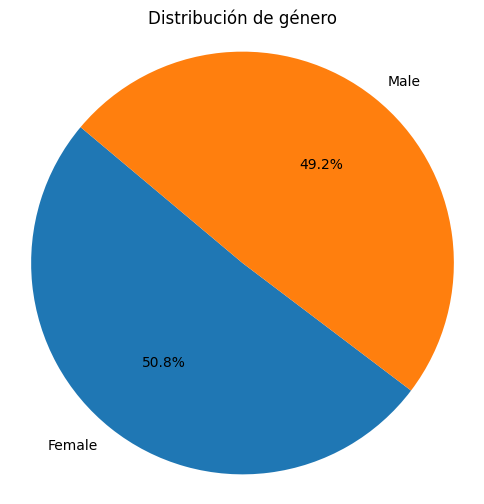

In [35]:
# Calcular el recuento de cada categoría en la columna "gender"
gender_counts = df['Gender'].value_counts()

# Crear un gráfico de pastel
plt.figure(figsize=(6, 6))  # Tamaño de la figura
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Esto asegura que el gráfico de pastel sea un círculo en lugar de una elipse

# Agregar un título
plt.title('Distribución de género')

# Mostrar el gráfico
plt.show()

In [36]:
df['debt_rate']=df['Total Debt_float']/df['Yearly Income - Person_float'] # porcentaje de salario que ocupa la deduda de una persona
df['income_comparasion']=df['Yearly Income - Person_float']/df['Per Capita Income - Zipcode_float'] # comparacion income vs promedio en sus zona



In [37]:
df=df[df['Per Capita Income - Zipcode_float']!=0]

In [38]:
df.to_csv('df.csv')

In [39]:
ls_cont=[]
for i in df.columns: 
    if df[i].nunique()>2:         
        if df[i].dtype!='object': 
            ls_cont.append(i)
ls_cont

['Amount_float_count',
 'Amount_float_sum',
 'Amount_float_min',
 'Amount_float_max',
 'Amount_float_mean',
 'Amount_float_median',
 'compras_caras_sum',
 'Day_min',
 'Day_max',
 'Day_mean',
 'Day_median',
 'day_of_week_max',
 'day_of_week_mean',
 'day_of_week_median',
 'Month_min',
 'Month_max',
 'Month_mean',
 'Month_median',
 'hour_min',
 'hour_max',
 'hour_mean',
 'hour_median',
 'is_weekend_sum',
 'Fraud_sum',
 'is_return_sum',
 'diferent_cities_',
 'Fraud_rate',
 'is_weekend_rate',
 'is_return_rate',
 'compras_caras_rate',
 'Current Age',
 'Retirement Age',
 'Birth Year',
 'Birth Month',
 'Apartment',
 'Zipcode',
 'Latitude',
 'Longitude',
 'FICO Score',
 'Num Credit Cards',
 'Per Capita Income - Zipcode_float',
 'Yearly Income - Person_float',
 'Total Debt_float',
 'TranPromAnio',
 'TranPromMes',
 'TranPromDia',
 'debt_rate',
 'income_comparasion']

In [40]:
tad=df[ls_cont]

In [41]:
tad

Amount_float_count  Amount_float_sum  Amount_float_min   
0                  10065         824728.25            -494.0  \
1                   4387         346727.70            -499.0   
2                  21005         737048.82            -498.0   
3                   4924         538649.51            -496.0   
4                   9318         911398.46            -500.0   
...                  ...               ...               ...   
1995                7409         174466.03            -477.0   
1996                9014         371215.73            -494.0   
1997               10814         351792.64            -481.0   
1998                2846         162332.36            -495.0   
1999                2347         144210.67            -463.0   

      Amount_float_max  Amount_float_mean  Amount_float_median   
0              1409.40          81.940214                69.96  \
1              1548.58          79.035263                67.57   
2              1097.18          35.089208                34.16   
3              3516.73         109.392671                54.69   
4              3613.22          97.810524                88.33   
...                ...                ...                  ...   
1995           1516.07          23.547851                 1.87   
1996           1241.47          41.182131                17.51   
1997           1243.24          32.531222                 3.84   
1998           1344.70          57.038777                32.39   
1999           1038.20          61.444683                50.46   

      compras_caras_sum  Day_min  Day_max   Day_mean  ...  FICO Score   
0                  3595        1       31  15.800397  ...         787  \
1                   951        1       31  16.093458  ...         701   
2                   884        1       31  15.626327  ...         698   
3                  1322        1       31  15.775386  ...         722   
4                  2686        1       31  15.809401  ...         675   
...                 ...      ...      ...        ...  ...         ...   
1995                400        1       31  15.581320  ...         703   
1996                960        1       31  15.774795  ...         740   
1997               1069        1       31  15.703348  ...         779   
1998                373        1       31  15.754743  ...         618   
1999                175        1       31  15.345548  ...         673   

      Num Credit Cards  Per Capita Income - Zipcode_float   
0                    5                              29278  \
1                    5                              37891   
2                    5                              22681   
3                    4                             163145   
4                    1                              53797   
...                ...                                ...   
1995                 3                              23550   
1996                 4                              24218   
1997                 3                              15175   
1998                 1                              25336   
1999                 2                              32325   

      Yearly Income - Person_float  Total Debt_float  TranPromAnio   
0                            59696            127613    529.736842  \
1                            77254            191349    243.722222   
2                            33483               196   1105.526316   
3                           249925            202328    351.714286   
4                           109687            183855    423.545455   
...                            ...               ...           ...   
1995                         48010             87837    529.214286   
1996                         49378            104480    474.421053   
1997                         30942             71066    514.952381   
1998                         54654             27241    316.222222   
1999                         65909            181261    586.7500

In [42]:
tad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1985 entries, 0 to 1999
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Amount_float_count                 1985 non-null   int64  
 1   Amount_float_sum                   1985 non-null   float64
 2   Amount_float_min                   1985 non-null   float64
 3   Amount_float_max                   1985 non-null   float64
 4   Amount_float_mean                  1985 non-null   float64
 5   Amount_float_median                1985 non-null   float64
 6   compras_caras_sum                  1985 non-null   int64  
 7   Day_min                            1985 non-null   int64  
 8   Day_max                            1985 non-null   int64  
 9   Day_mean                           1985 non-null   float64
 10  Day_median                         1985 non-null   float64
 11  day_of_week_max                    1985 non-null   int32  
 1

# limpieza


In [43]:
# remocion de variables con alto contenido de missings (mayor al 10%)
def remover_variables_nulas(df, umbral=0.10):
    # Calcula el porcentaje de valores nulos por columna
    porcentaje_nulos = df.isnull().mean()

    # Obtiene las variables que superan el umbral de valores nulos
    variables_a_remover = porcentaje_nulos[porcentaje_nulos > umbral].index.tolist()

    # Elimina las variables del DataFrame
    df.drop(variables_a_remover, axis=1, inplace=True)
    print(f"las variables que se removieron son: {variables_a_remover}")

In [44]:
remover_variables_nulas(tad)

las variables que se removieron son: ['Apartment']


In [45]:
#Validamos ahora para inf variables
inf_values = np.isinf(tad).sum().items()
inf_variables = [var for var, n_inf in inf_values if n_inf > 0]
inf_variables # no hay variables con infinitos

[]

In [46]:
corr_matrix = tad.corr()
ls_checked = []
ls_correlated = []
for col in corr_matrix.columns:
    ls_checked.append(col)
    ls_correlated += corr_matrix[(corr_matrix[col] >= 0.99) & (~corr_matrix.index.isin(ls_checked))].index.tolist()
ls_correlated = list(set(ls_correlated))
ls_correlated = [variable for variable in ls_correlated]
print(f"las variables con correlacion de 0.999 con respecto a otra son: {ls_correlated}") #  tenemos 1 varibale con correlaicon 0.999 respecto a otra, se eliminara
tad=tad.drop(ls_correlated,axis=1)

las variables con correlacion de 0.999 con respecto a otra son: ['is_weekend_sum']


In [47]:
def remover_variables_unarias(df, umbral=0.9999):
    # Calcula el valor más común en cada columna
    valores_comunes = df.mode().iloc[0]

    # Obtiene las variables que superan el umbral de igualdad
    variables_a_remover = []
    for columna in df.columns:
        valor_comun = valores_comunes[columna]
        porcentaje_igual = (df[columna] == valor_comun).mean()
        if porcentaje_igual > umbral:
            variables_a_remover.append(columna)

    # Elimina las variables del DataFrame
    print(f"variables unarias a remover: {variables_a_remover}")
    df.drop(variables_a_remover, axis=1, inplace=True)

In [48]:
remover_variables_unarias(tad, umbral=0.99)

variables unarias a remover: ['day_of_week_max']


In [49]:
# tratamiento de outliers 
def detect_outlier(serie, method):
    if method == "iqr":
        q1 = serie.quantile(.25)
        q3 = serie.quantile(.75)
        iqr = q3-q1
        upper_fence = q3 + 1.5*iqr
        lower_fence = q1 - 1.5*iqr
    elif method == "z-score":
        mean = serie.mean()
        std = serie.std()
        upper_fence = mean + 3*std
        lower_fence = mean - 3*std
    else:
        upper_fence = serie.quantile(.99)
        lower_fence = serie.quantile(.01)
    return ~serie.between(lower_fence, upper_fence, inclusive="both")

In [50]:
Xp = pd.concat(map(lambda column: detect_outlier(tad[column], "other").rename(f"{column}_ol"), tad.columns), axis=1)

In [51]:
shape_old = df.shape
shape_new=Xp[Xp.mean(axis=1)<0.2].shape #renglones que tengan menos del 30% de variables detectadas como outlier
shape_new[0] / shape_old[0] # proporcion de tamaño del nuevo data frame, sin valores extremos

0.9954659949622167

In [52]:
#vamos a eliminar los outliers 
df2 =tad[Xp.mean(axis=1)<0.2].reset_index()

In [53]:
df2.info() # no es necesario imputar valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1976 entries, 0 to 1975
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   index                              1976 non-null   int64  
 1   Amount_float_count                 1976 non-null   int64  
 2   Amount_float_sum                   1976 non-null   float64
 3   Amount_float_min                   1976 non-null   float64
 4   Amount_float_max                   1976 non-null   float64
 5   Amount_float_mean                  1976 non-null   float64
 6   Amount_float_median                1976 non-null   float64
 7   compras_caras_sum                  1976 non-null   int64  
 8   Day_min                            1976 non-null   int64  
 9   Day_max                            1976 non-null   int64  
 10  Day_mean                           1976 non-null   float64
 11  Day_median                         1976 non-null   float

# EDA

In [54]:
# EDA post limpieza

for variable in df2.columns:
    fig = px.histogram(df2, x=variable, title=f"{variable}'s histogram")
    fig.update_layout(
        autosize=False,
        width=500,  # Ajusta el ancho según tus necesidades
        height=400,  # Ajusta la altura según tus necesidades
    )
    fig.show()

In [55]:
#MDS 
mm = MinMaxScaler()
Xmm = pd.DataFrame(mm.fit_transform(df2), columns=df2.columns)

In [1]:
j=3
mds2 = MDS(j)
Xmm_sample=Xmm
Xmds_sample = pd.DataFrame(mds2.fit_transform(Xmm_sample), columns=[f'd_{i}' for i in range(j)])
Xmds_sample.head(3)
Xmds_modeling=Xmds_sample.copy()

NameError: name 'MDS' is not defined

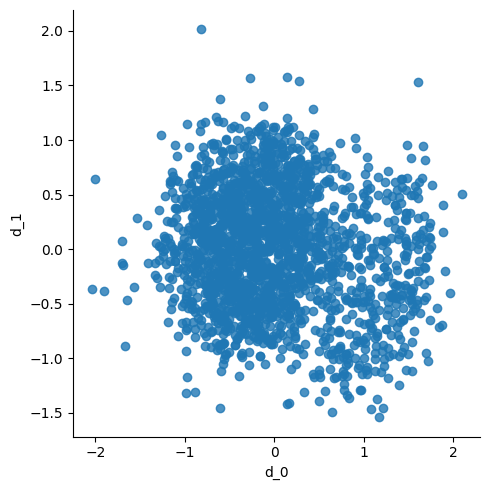

In [57]:
sns.lmplot(data=Xmds_sample, x='d_0', y='d_1', fit_reg=False)

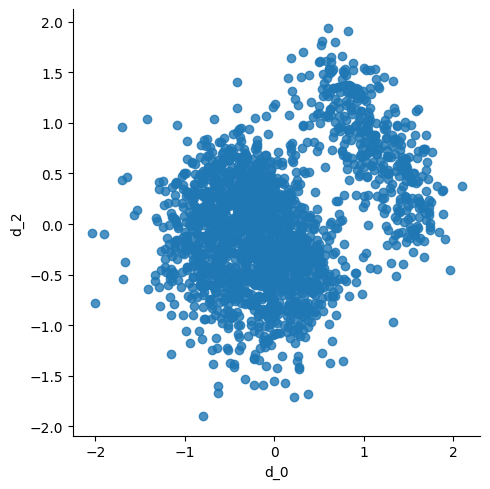

In [58]:
sns.lmplot(data=Xmds_sample, x='d_0', y='d_2', fit_reg=False)

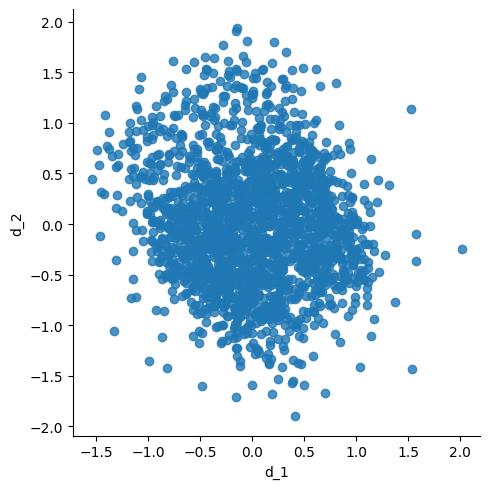

In [59]:
sns.lmplot(data=Xmds_sample, x='d_1', y='d_2', fit_reg=False)

/home/carlos/Documentos/diplomado/modulo 1/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/carlos/Documentos/diplomado/modulo 1/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/carlos/Documentos/diplomado/modulo 1/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/carlos/Documentos/diplomado/modulo 1/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Text(0, 0.5, 'Inercia')

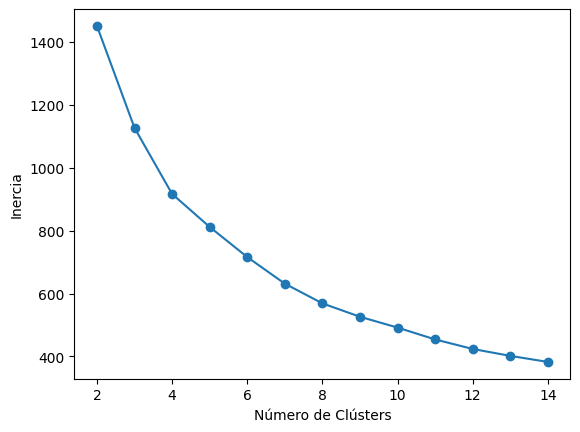

In [60]:
inertia = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Xmds_sample)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 15), inertia, marker='o')
plt.xlabel('Número de Clústers')
plt.ylabel('Inercia')

In [61]:
# modelacion Kmeans
# K-Means (k=3) por visaulización:
kmeans_mds_3 = KMeans(3)
kmeans_mds_3.fit(Xmds_sample)

predictions = kmeans_mds_3.fit_predict(Xmds_sample)
Xmds_sample['kmeans_mds_3'] = predictions

/home/carlos/Documentos/diplomado/modulo 1/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/carlos/Documentos/diplomado/modulo 1/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [62]:
Xmds_sample

d_0       d_1       d_2  kmeans_mds_3
0     0.088467 -0.147389 -1.307134             2
1    -0.550667 -0.967715 -0.277201             1
2    -0.451033  0.159203 -1.386414             2
3    -1.419501  0.221051  1.039537             1
4     0.531077  0.063762 -1.280914             2
...        ...       ...       ...           ...
1971 -0.458687 -0.442758  0.490611             1
1972 -0.582636 -0.343632 -0.548226             1
1973 -0.733774  0.330199  0.684661             1
1974 -0.691503  0.401649  0.708594             1
1975 -0.362138 -0.986089  0.434250             1

[1976 rows x 4 columns]

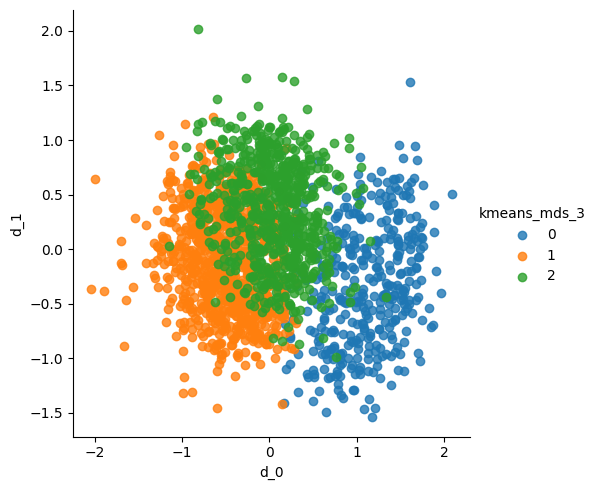

In [63]:
sns.lmplot(data=Xmds_sample, x='d_0', y='d_1', fit_reg=False, hue='kmeans_mds_3')

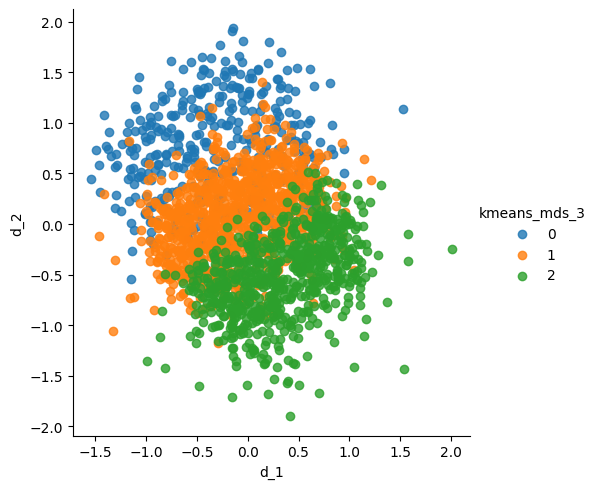

In [64]:
sns.lmplot(data=Xmds_sample, x='d_1', y='d_2', fit_reg=False, hue='kmeans_mds_3')

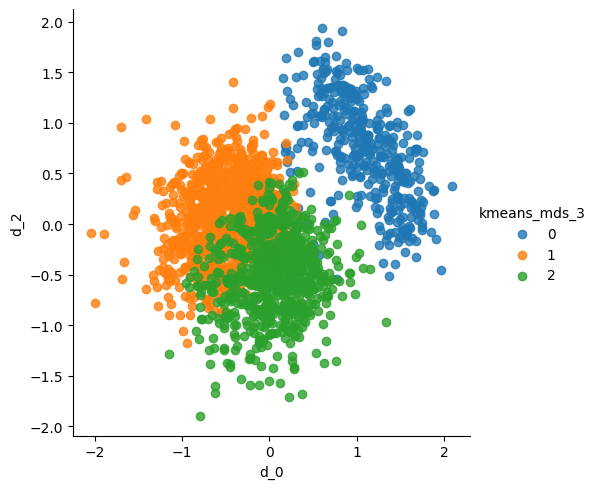

In [65]:
sns.lmplot(data=Xmds_sample, x='d_0', y='d_2', fit_reg=False, hue='kmeans_mds_3')

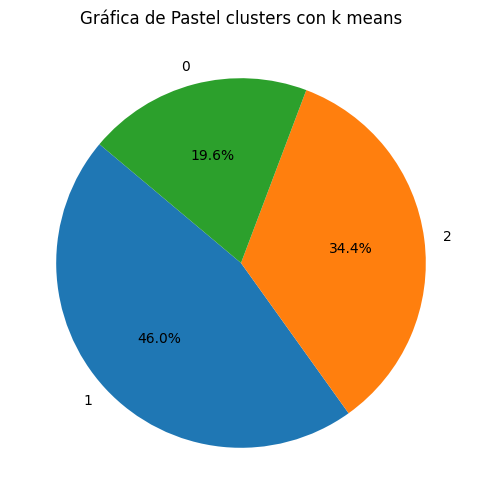

In [66]:
conteo_clusters = Xmds_sample['kmeans_mds_3'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(conteo_clusters, labels=conteo_clusters.index, autopct='%1.1f%%', startangle=140)
plt.title('Gráfica de Pastel clusters con k means')
plt.show()

# Problematica 1, beneficios de inversion 


In [67]:
ls_best=['Yearly Income - Person_float','Total Debt_float','Current Age', 'FICO Score','income_comparasion','debt_rate','compras_caras_rate','TranPromMes', 'Retirement Age', 'Amount_float_mean', 'Amount_float_max',
        'Amount_float_min','Amount_float_count','TranPromAnio','diferent_cities_','Birth Year','Amount_float_sum']

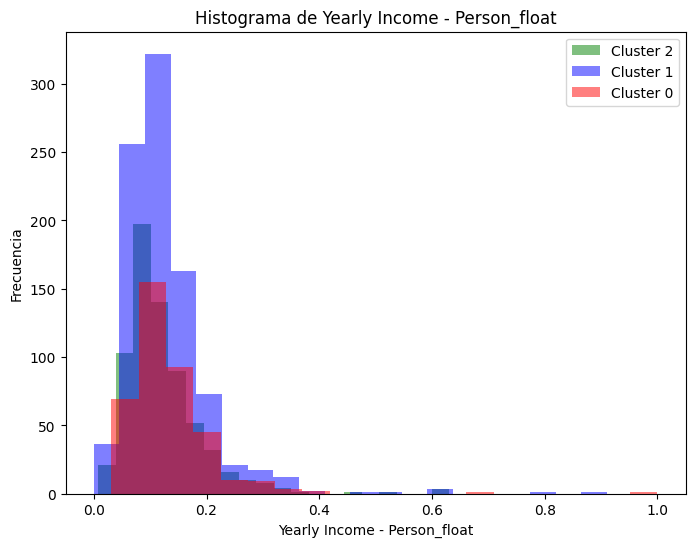

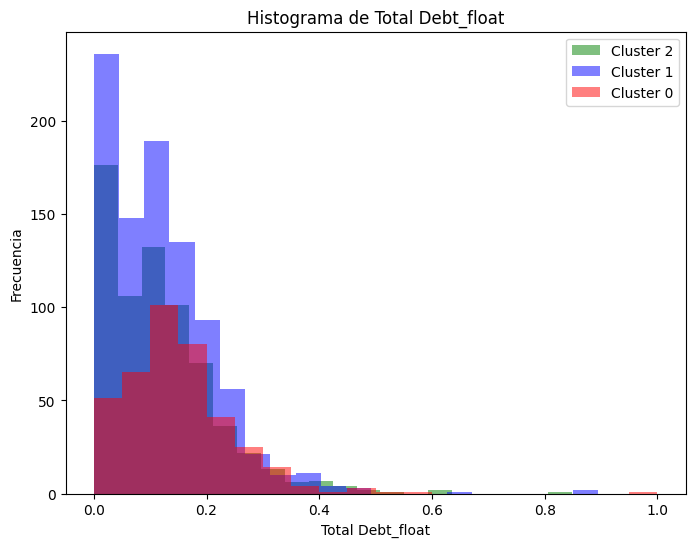

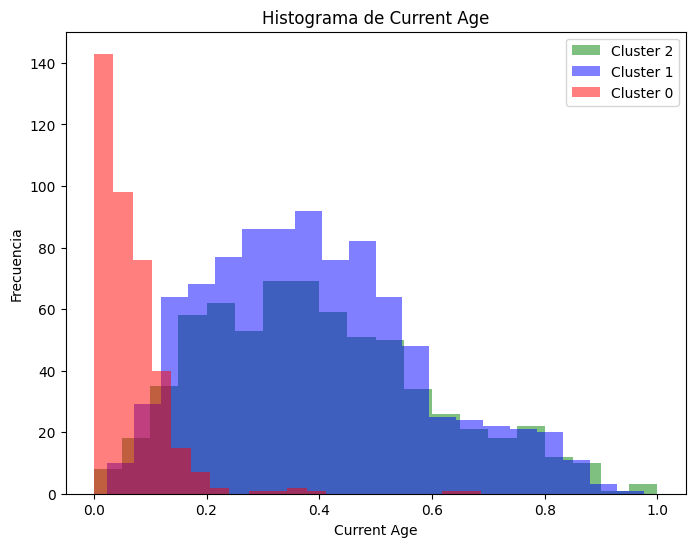

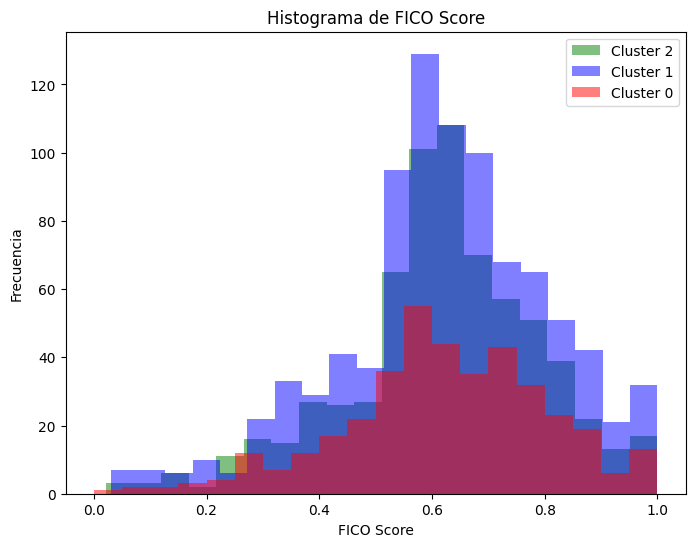

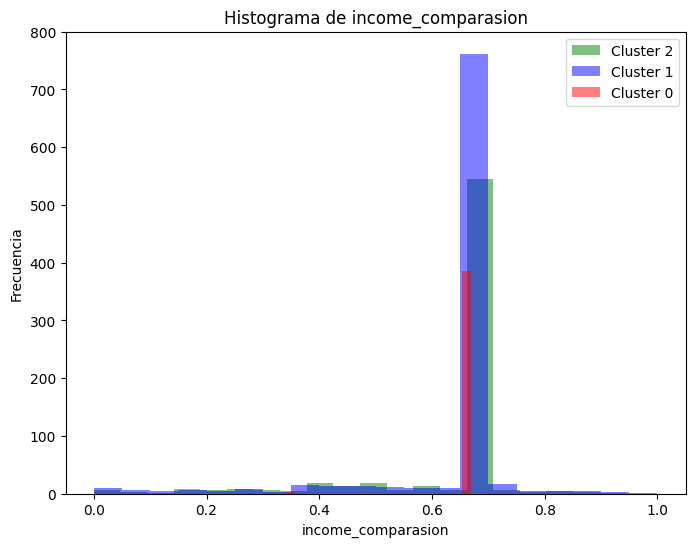

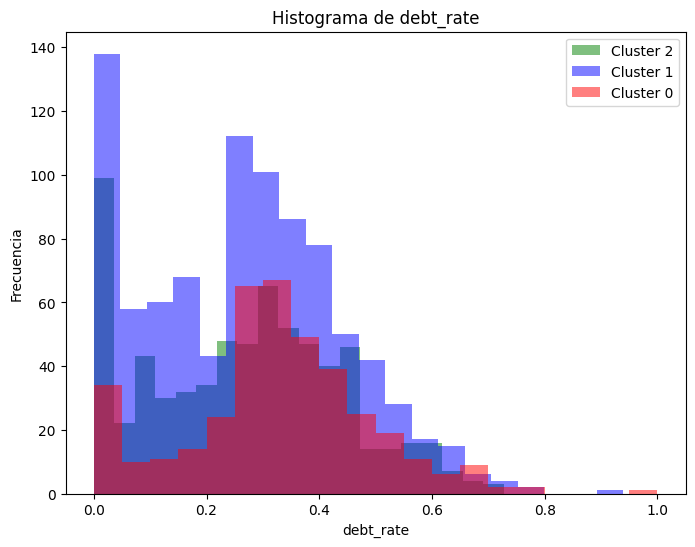

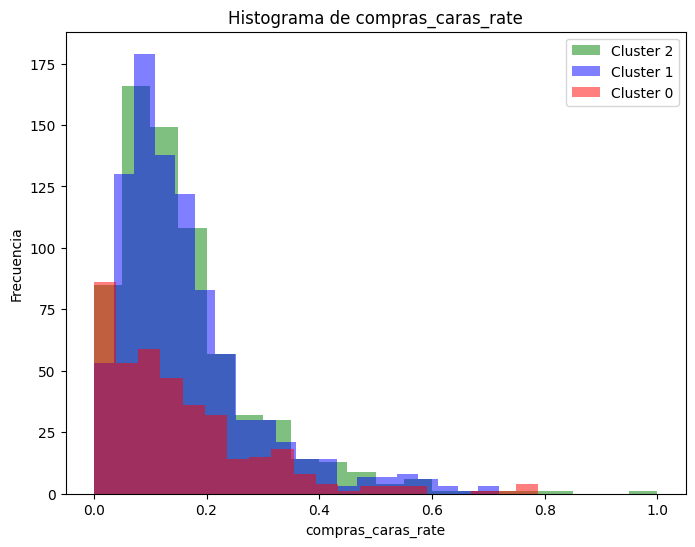

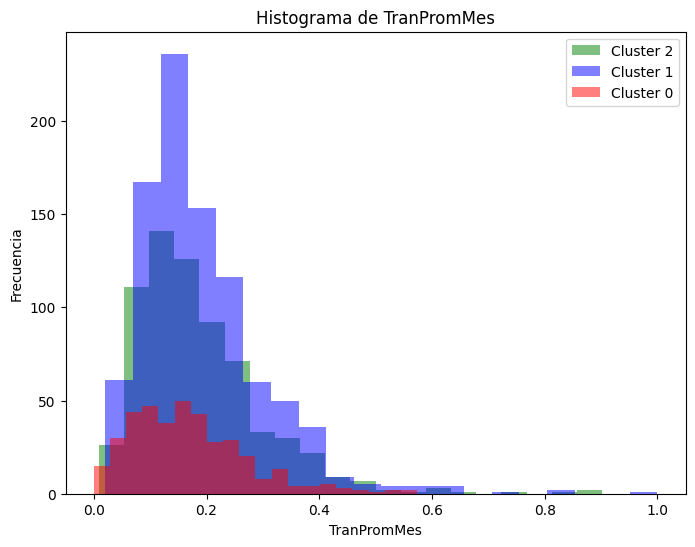

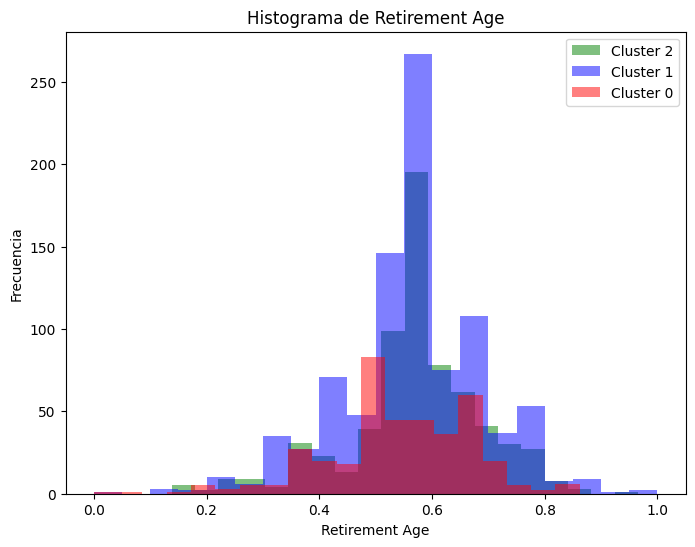

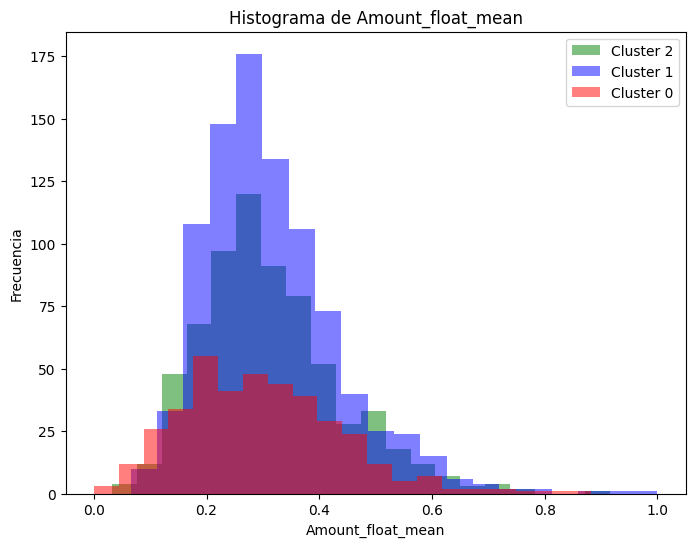

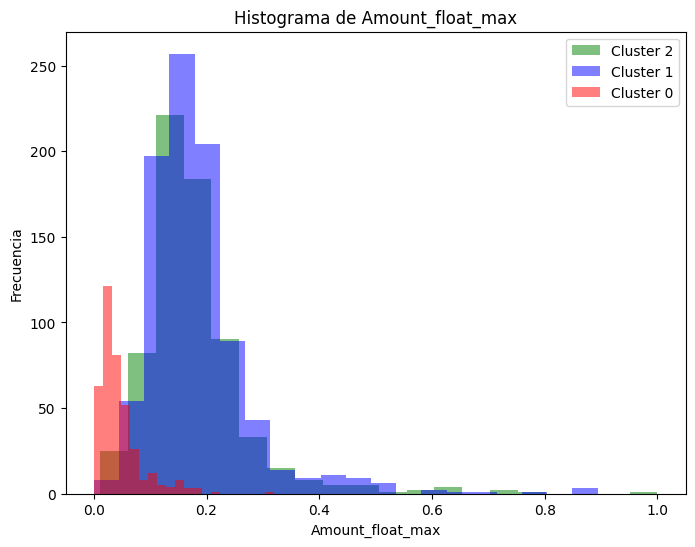

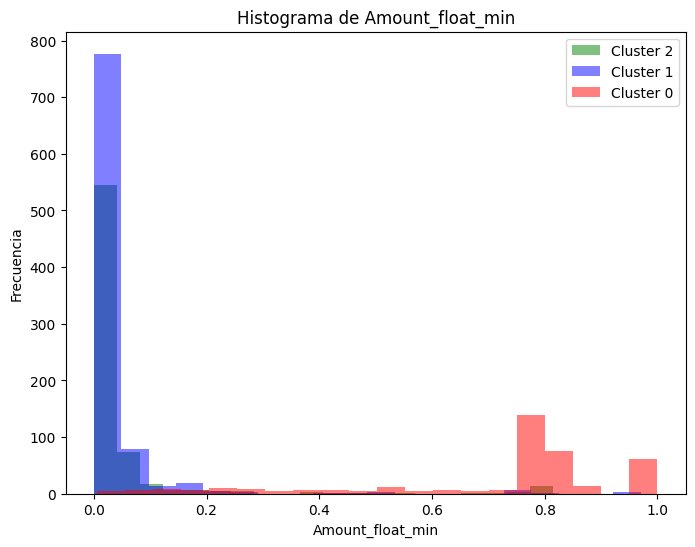

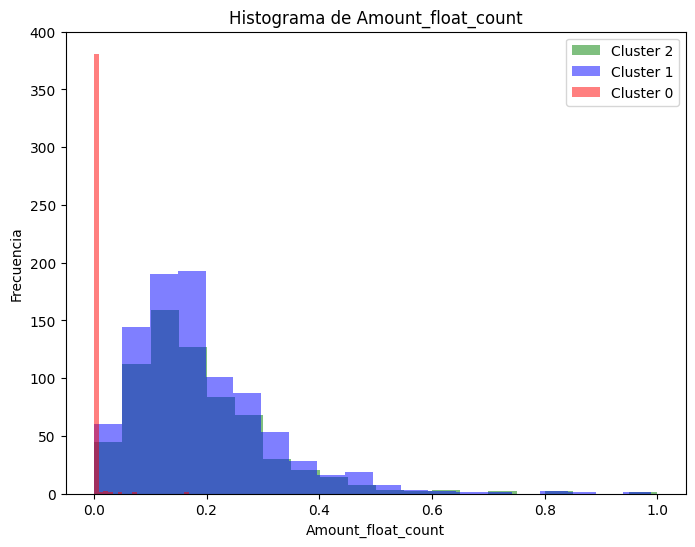

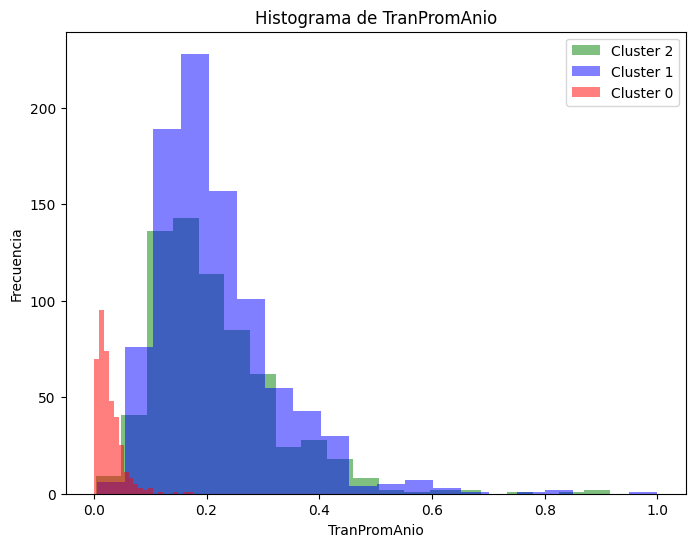

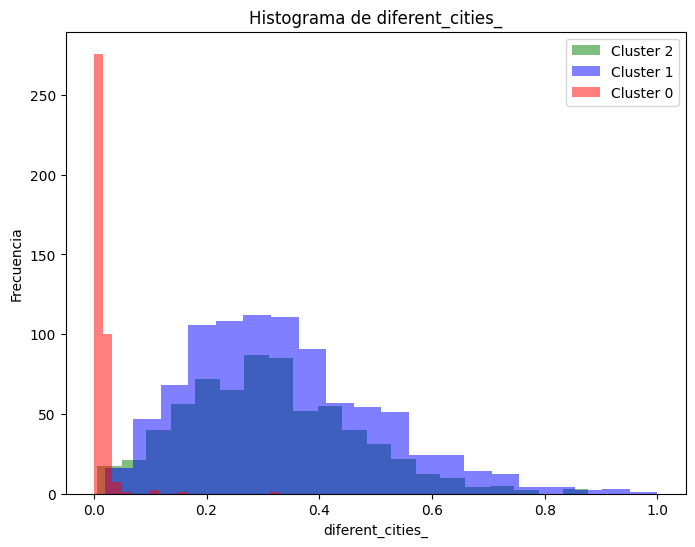

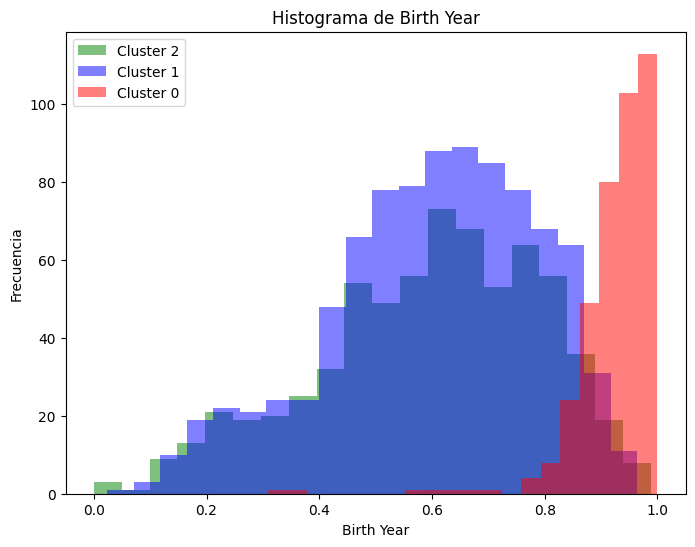

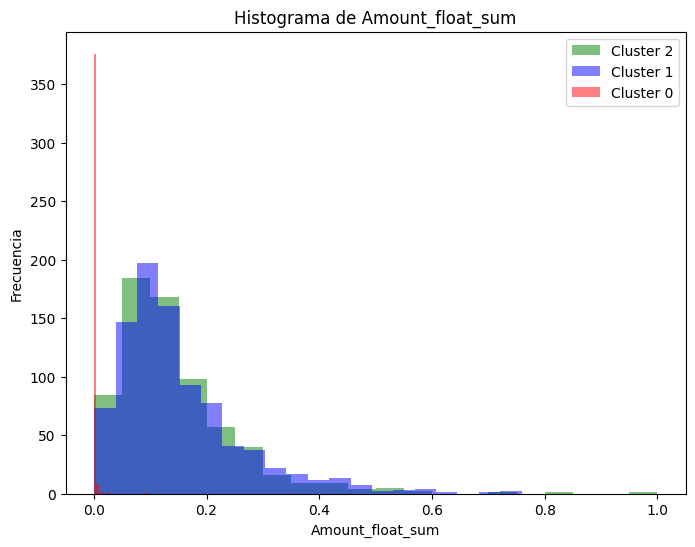

In [68]:
unique_clusters = Xmds_sample['kmeans_mds_3'].unique()

# Color mapping para kmeans_mds_3
color_mapping = {0: 'red', 1: 'blue', 2: 'green'}

# Itera a través de las variables en ls_best
for variable in ls_best:
    # Crear un nuevo histograma para la variable actual
    plt.figure(figsize=(8, 6))  # Establece el tamaño de la figura (opcional)
    
    # Itera a través de los valores únicos de kmeans_mds_3
    for cluster_value in unique_clusters:
        # Restablece el índice del DataFrame Xmm_sample antes de la selección
        subset_data = Xmm_sample.reset_index(drop=True)[Xmds_sample['kmeans_mds_3'] == cluster_value][variable]
        
        # Crea el histograma utilizando solo un color para este conjunto de datos
        plt.hist(subset_data, bins=20, color=color_mapping[cluster_value], alpha=0.5, label=f'Cluster {cluster_value}')
    
    # Configura el título y etiquetas de los ejes
    plt.title(f'Histograma de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    
    # Agrega una leyenda para identificar los clusters
    plt.legend()
    
    # Muestra la gráfica
    plt.show()

In [69]:
# select k best inversa

kb=SelectKBest(k='all', score_func=f_classif)
kb.fit(Xmm_sample,Xmds_sample['kmeans_mds_3'])
importancia_caracteristicas = kb.scores_
importancia_df = pd.DataFrame({'Caracteristica': Xmm_sample.columns, 'Importancia': importancia_caracteristicas}).sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_df

Caracteristica   Importancia
0                          Month_mean  12869.437014
1                           Month_max  12294.315843
2                        Month_median   8116.458707
3                    Amount_float_min   3517.016075
4                             Zipcode   1541.073230
5                           Longitude    971.264578
6                            hour_min    916.487820
7                    diferent_cities_    722.283003
8                            hour_max    685.195219
9                             Day_max    564.378581
10                       TranPromAnio    549.590782
11                         Birth Year    545.489120
12                        Current Age    544.337473
13                 Amount_float_count    448.142164
14                   Amount_float_max    371.470787
15                   Amount_float_sum    343.854332
16                           Day_mean    198.894763
17                          Fraud_sum    196.089981
18                         Fraud_rate    162.417284
19                  compras_caras_sum    157.624582
20                   Num Credit Cards    146.214275
21                         Day_median     97.742499
22                            Day_min     89.438793
23                          Month_min     58.316705
24                      is_return_sum     57.049197
25                 income_comparasion     19.390068
26                          debt_rate     19.328603
27                   Total Debt_float     14.850165
28                 day_of_week_median     11.946759
29                   day_of_week_mean      9.308784
30                           Latitude      7.753033
31                        TranPromMes      5.642636
32                        TranPromDia      5.447987
33                     Retirement Age      3.421028
34       Yearly Income - Person_float      3.201708
35                        hour_median      3.082015
36                  Amount_float_mean      2.176700
37                        Birth Month      1.581703
38                              index      1.326816
39                 compras_caras_rate      1.282207
40                     is_return_rate      1.269897
41                    is_weekend_rate      1.094386
42                          hour_mean      1.043691
43  Per Capita Income - Zipcode_float      0.551071
44                Amount_float_median      0.211811
45                         FICO Score      0.114237

In [70]:
# modelacion Kmeans
# K-Means (k=3) por visaulización:
kmeans_mds_3 = KMeans(2)
kmeans_mds_3.fit(Xmds_sample)

predictions = kmeans_mds_3.fit_predict(Xmds_sample)
Xmds_sample['kmeans_mds_2'] = predictions

/home/carlos/Documentos/diplomado/modulo 1/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/carlos/Documentos/diplomado/modulo 1/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



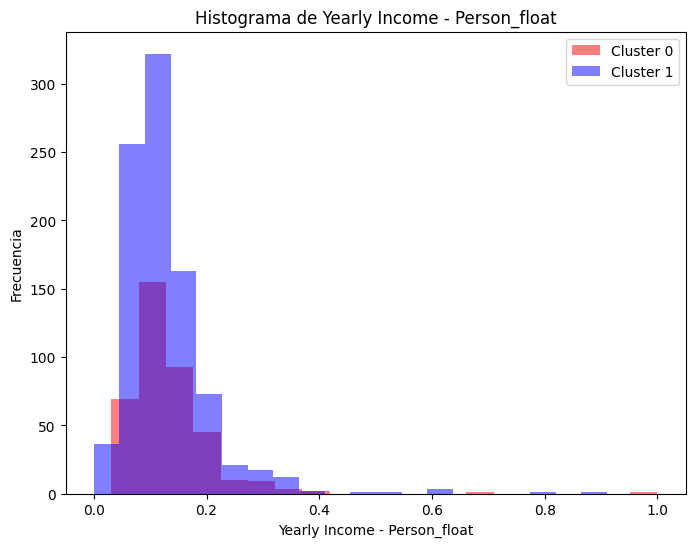

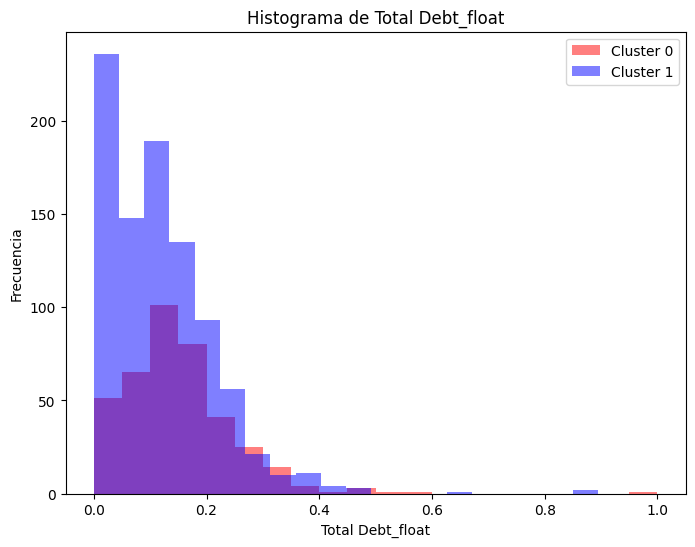

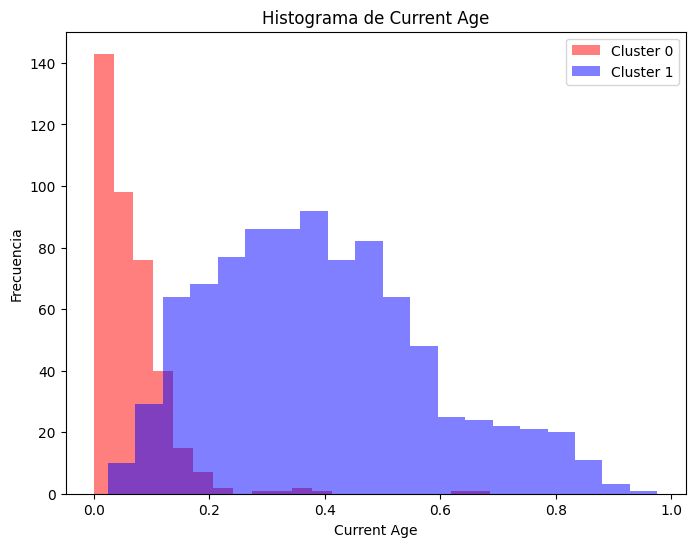

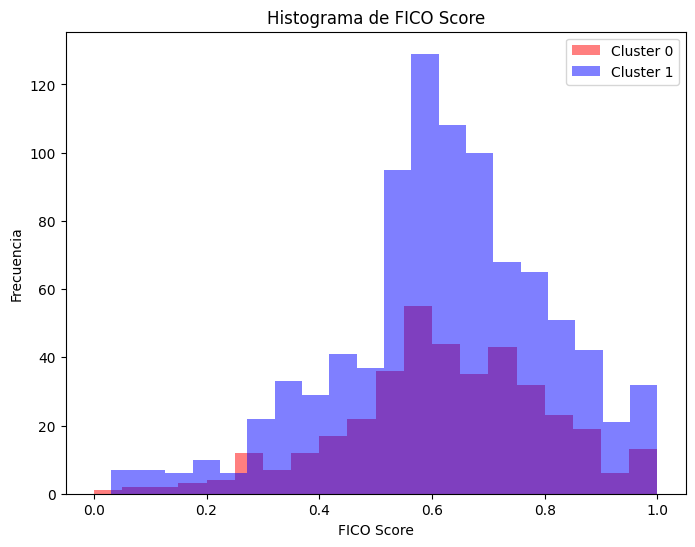

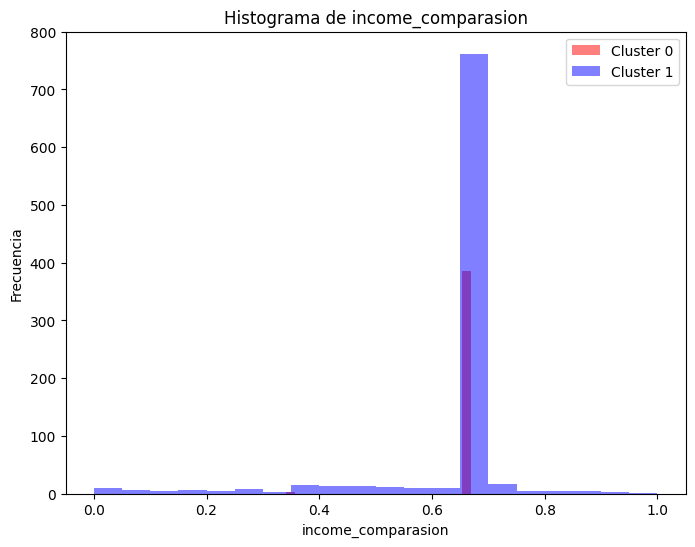

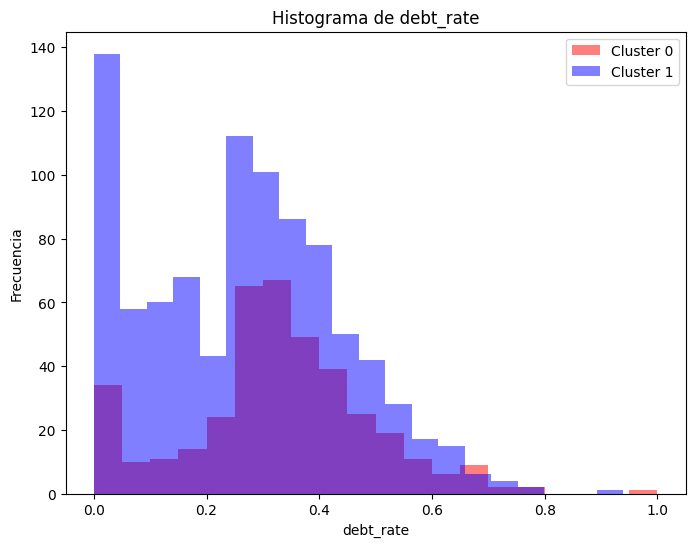

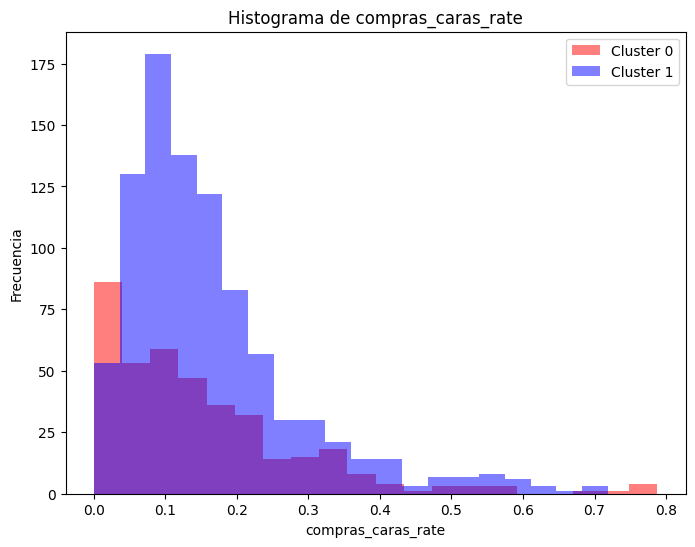

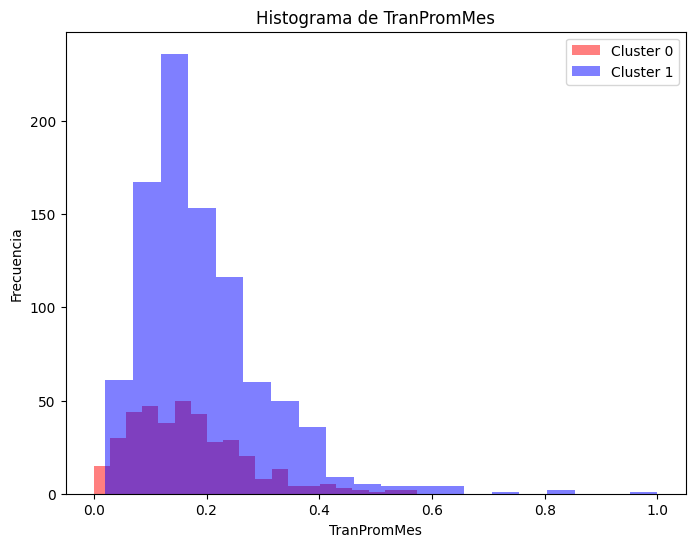

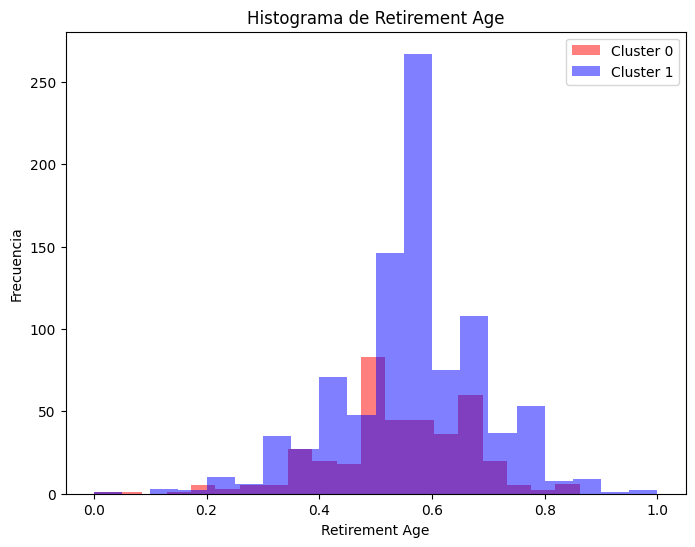

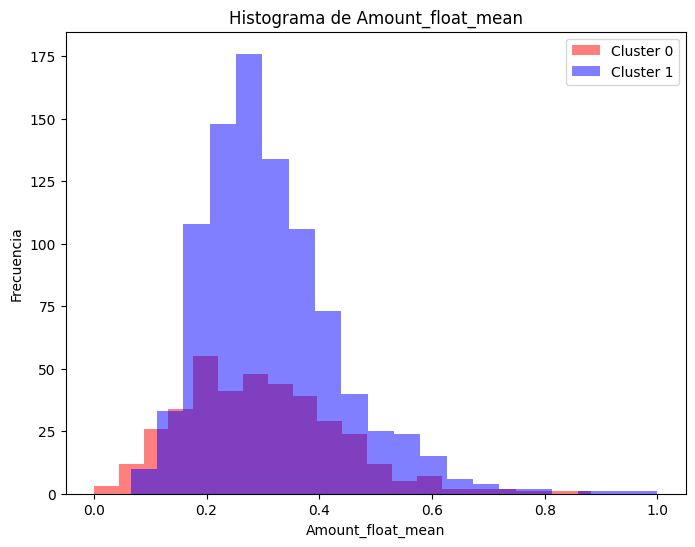

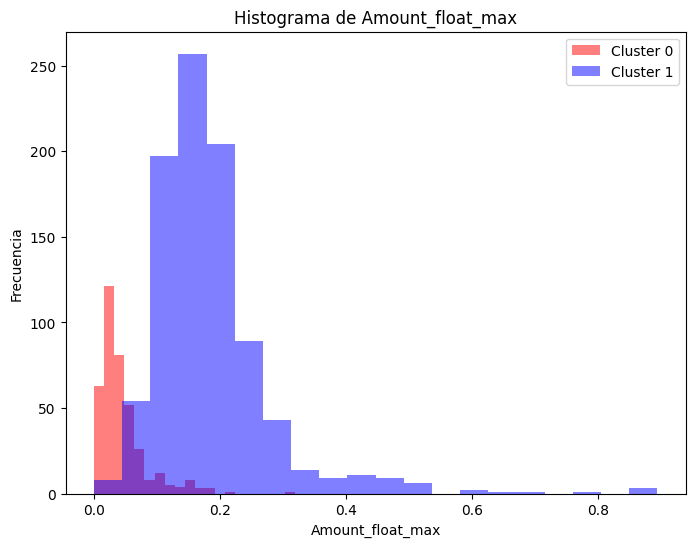

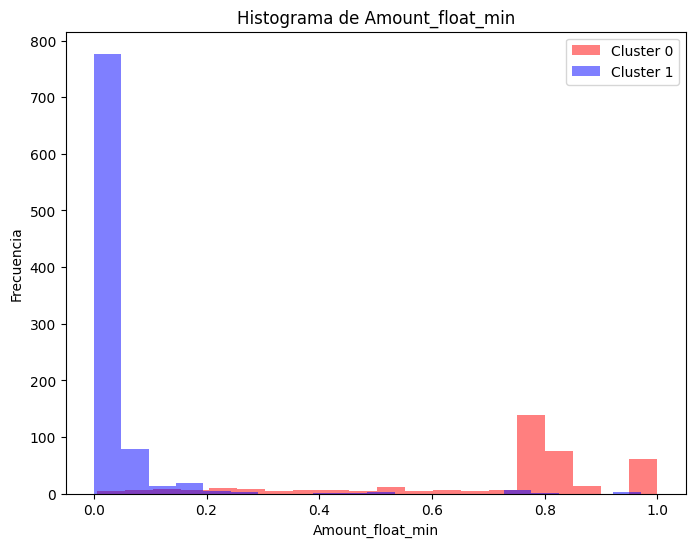

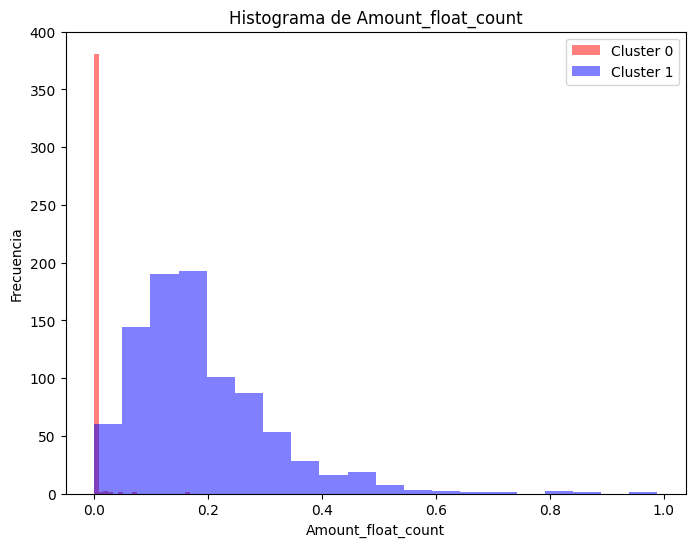

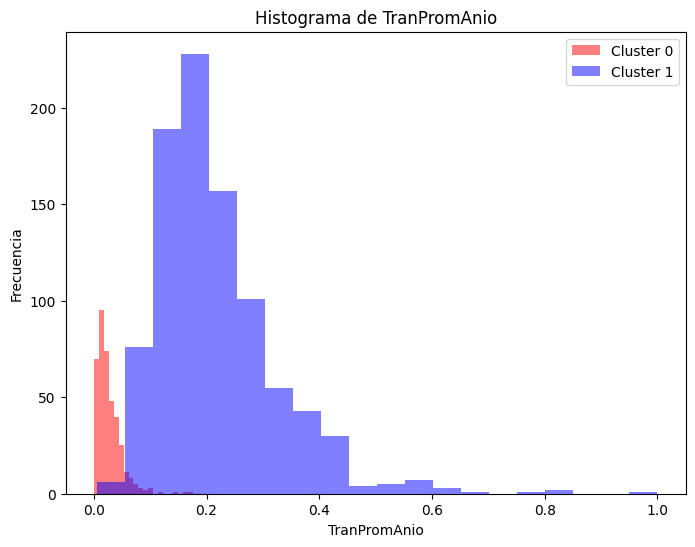

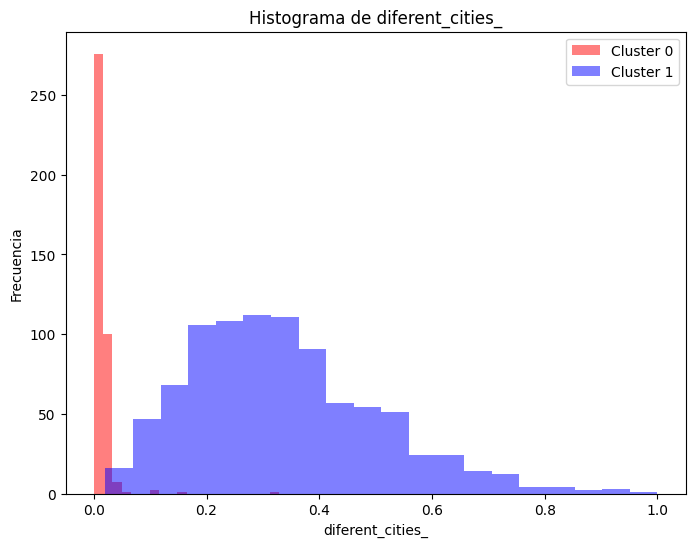

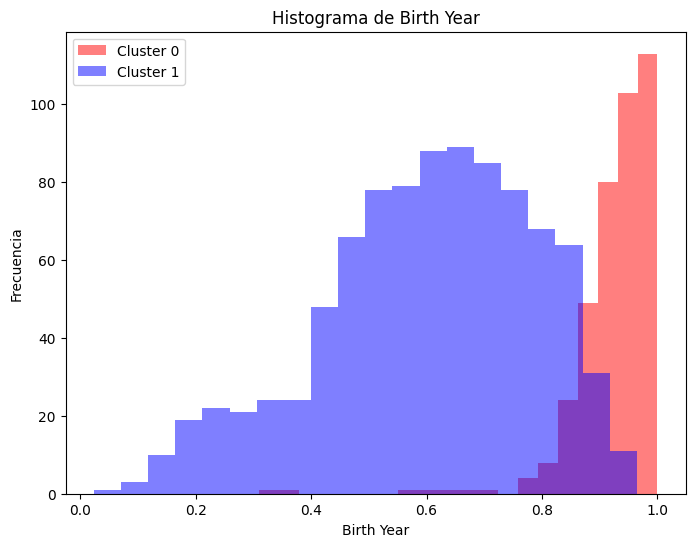

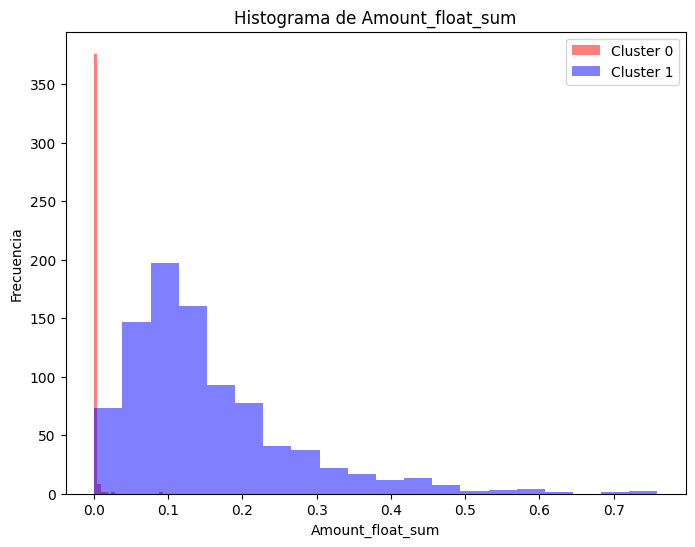

In [71]:
unique_clusters = Xmds_sample['kmeans_mds_2'].unique()

# Color mapping para kmeans_mds_3
color_mapping = {0: 'red', 1: 'blue', 2: 'green'}

# Itera a través de las variables en ls_best
for variable in ls_best:
    # Crear un nuevo histograma para la variable actual
    plt.figure(figsize=(8, 6))  # Establece el tamaño de la figura (opcional)
    
    # Itera a través de los valores únicos de kmeans_mds_3
    for cluster_value in unique_clusters:
        # Restablece el índice del DataFrame Xmm_sample antes de la selección
        subset_data = Xmm_sample.reset_index(drop=True)[Xmds_sample['kmeans_mds_3'] == cluster_value][variable]
        
        # Crea el histograma utilizando solo un color para este conjunto de datos
        plt.hist(subset_data, bins=20, color=color_mapping[cluster_value], alpha=0.5, label=f'Cluster {cluster_value}')
    
    # Configura el título y etiquetas de los ejes
    plt.title(f'Histograma de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    
    # Agrega una leyenda para identificar los clusters
    plt.legend()
    
    # Muestra la gráfica
    plt.show()

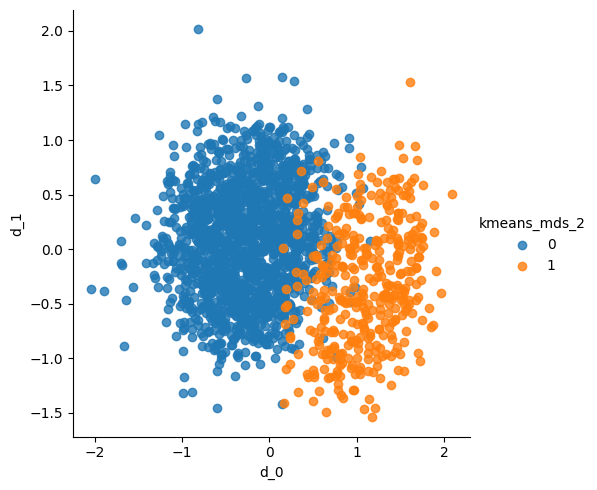

In [72]:
sns.lmplot(data=Xmds_sample, x='d_0', y='d_1', fit_reg=False, hue='kmeans_mds_2')

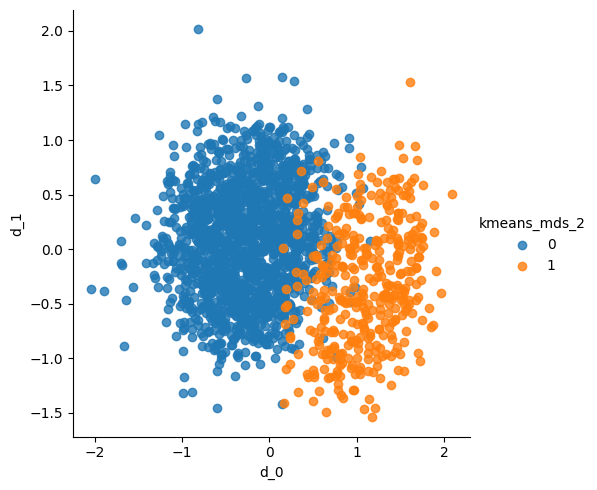

In [73]:
sns.lmplot(data=Xmds_sample, x='d_0', y='d_1', fit_reg=False, hue='kmeans_mds_2')

In [74]:
# resolucion de la problematica 

In [75]:
Xmm_negocio=Xmm[ls_best]
j=3
mds2 = MDS(j)
Xmm_sample=Xmm_negocio
Xmds_sample = pd.DataFrame(mds2.fit_transform(Xmm_negocio), columns=[f'd_{i}' for i in range(j)])
Xmds_sample.head(3)
Xmds_modeling=Xmds_sample.copy()

/home/carlos/Documentos/diplomado/modulo 1/myenv/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



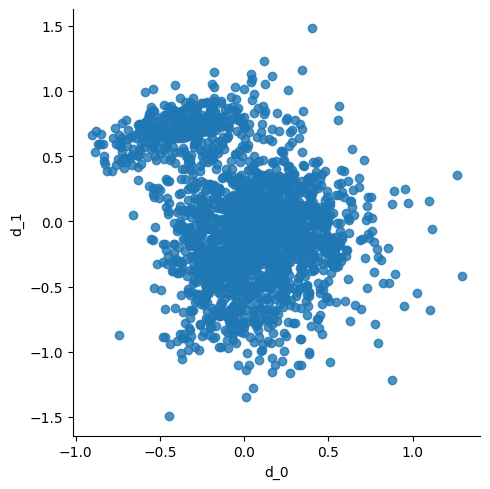

In [76]:
sns.lmplot(data=Xmds_sample, x='d_0', y='d_1', fit_reg=False)

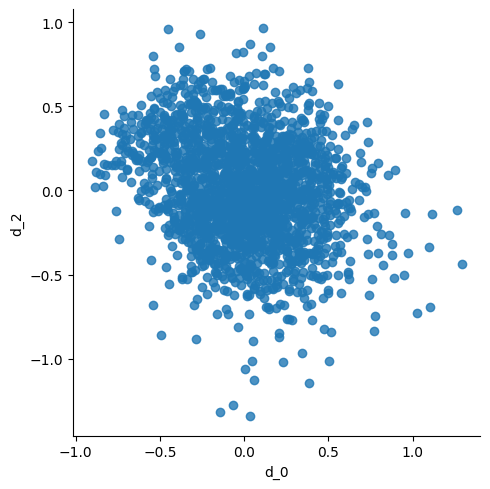

In [77]:
sns.lmplot(data=Xmds_sample, x='d_0', y='d_2', fit_reg=False)

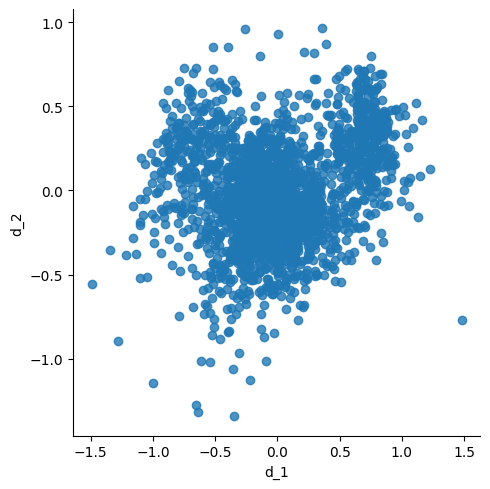

In [78]:
sns.lmplot(data=Xmds_sample, x='d_1', y='d_2', fit_reg=False)

/home/carlos/Documentos/diplomado/modulo 1/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/carlos/Documentos/diplomado/modulo 1/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/carlos/Documentos/diplomado/modulo 1/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/carlos/Documentos/diplomado/modulo 1/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Text(0, 0.5, 'Inercia')

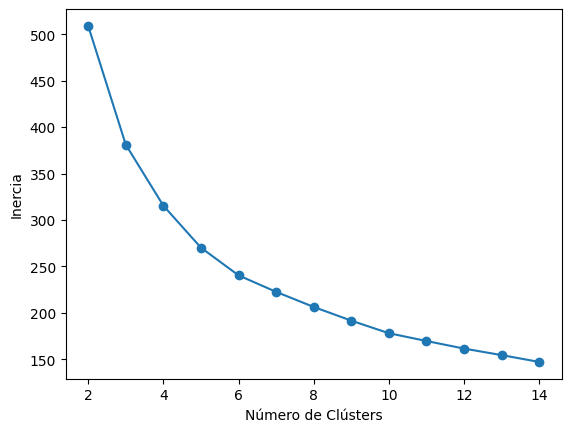

In [79]:
inertia = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Xmds_sample)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 15), inertia, marker='o')
plt.xlabel('Número de Clústers')
plt.ylabel('Inercia')

In [80]:
# modelando solo con las vartiables que nos intersan
# modelacion Kmeans
# K-Means (k=3) por visaulización:


kmeans_mds_3 = KMeans(3)
kmeans_mds_3.fit(Xmm_negocio)

predictions = kmeans_mds_3.fit_predict(Xmm_negocio)
Xmds_sample['kmeans_negocio_3'] = predictions

/home/carlos/Documentos/diplomado/modulo 1/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/carlos/Documentos/diplomado/modulo 1/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



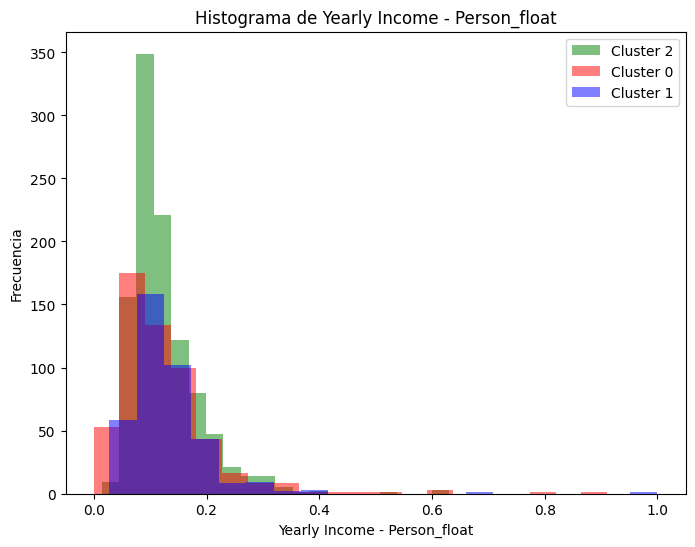

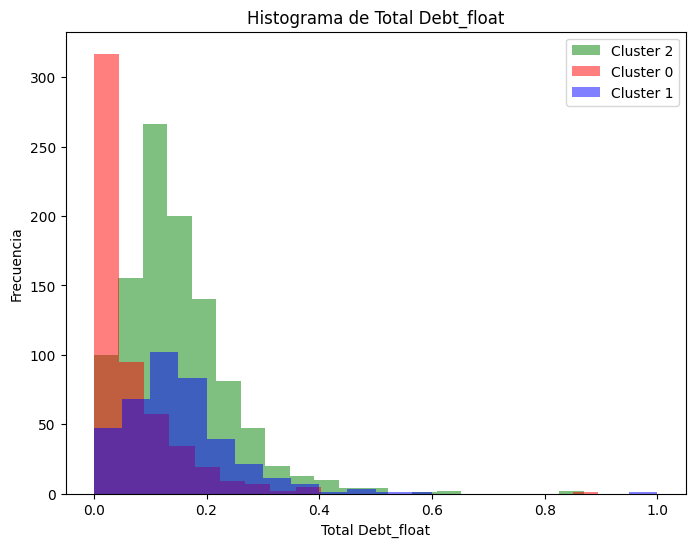

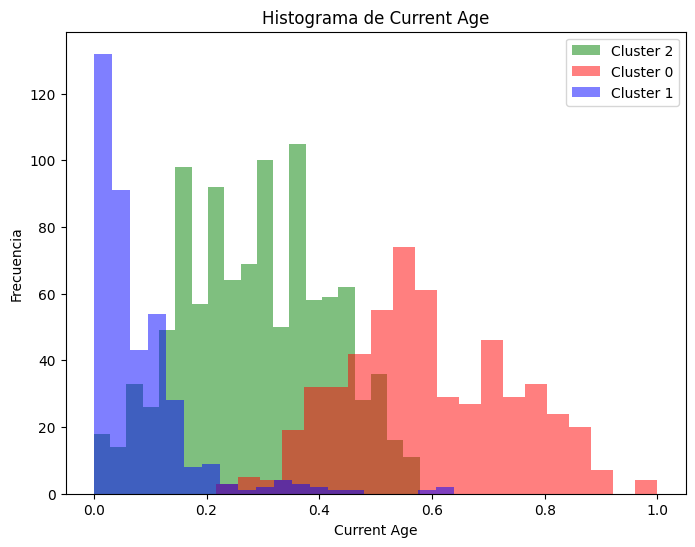

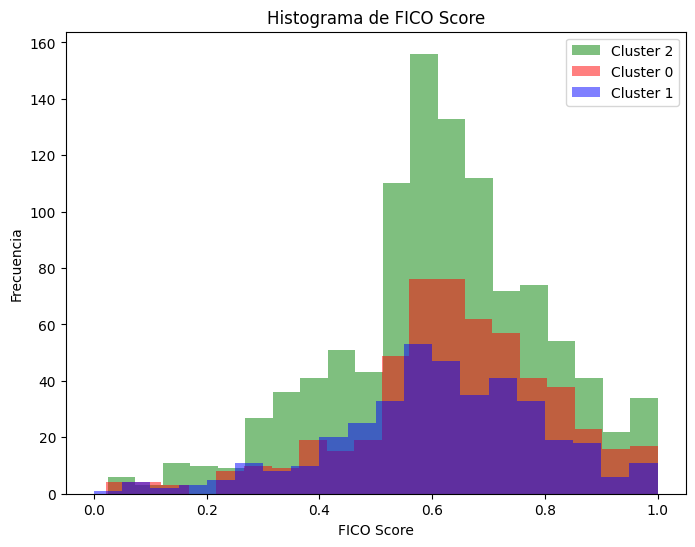

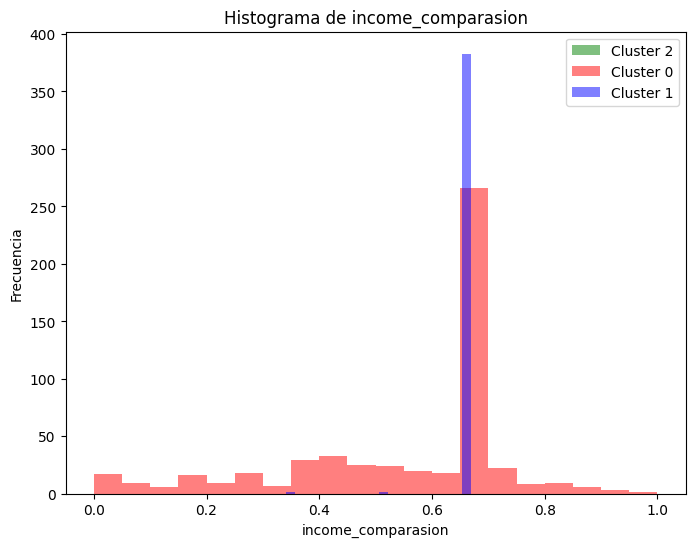

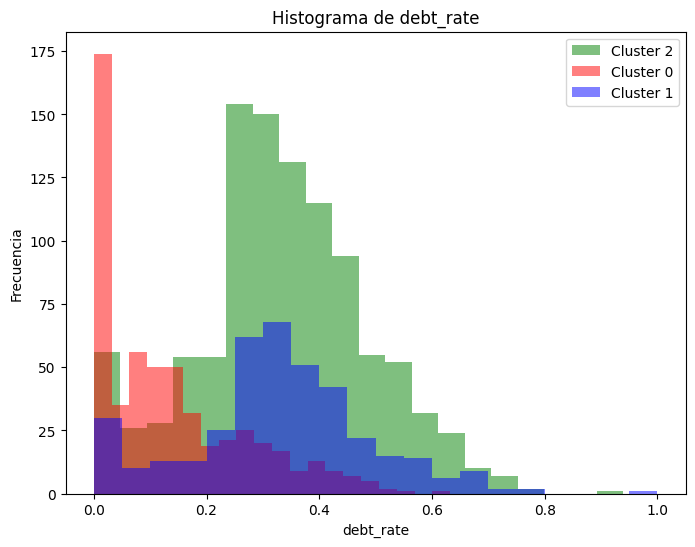

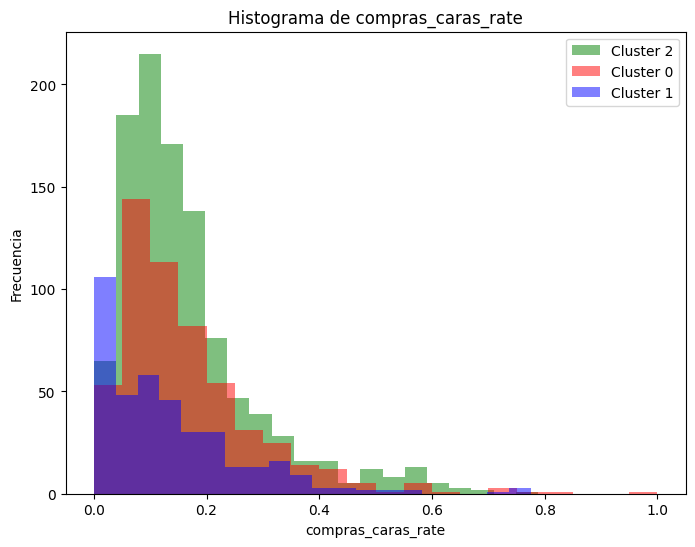

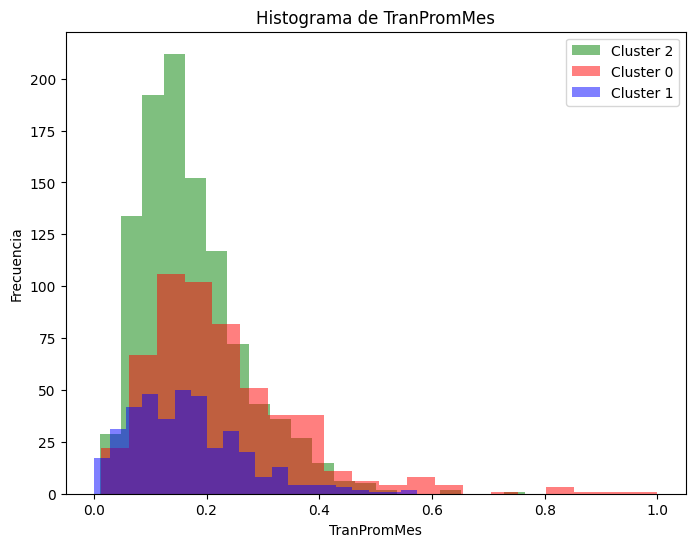

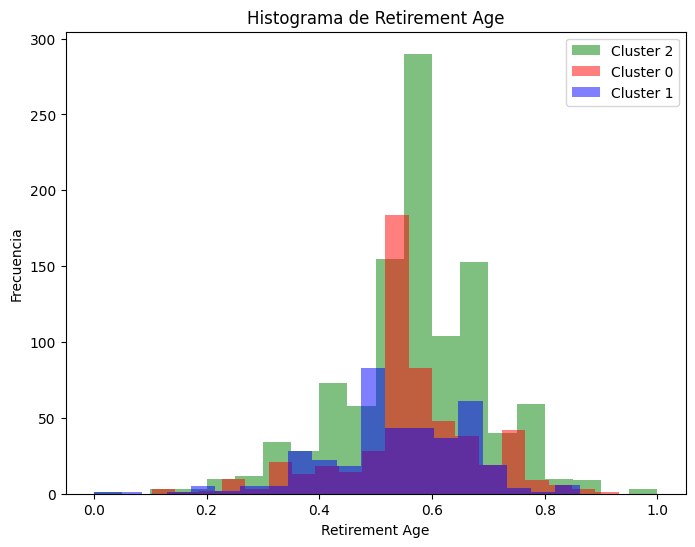

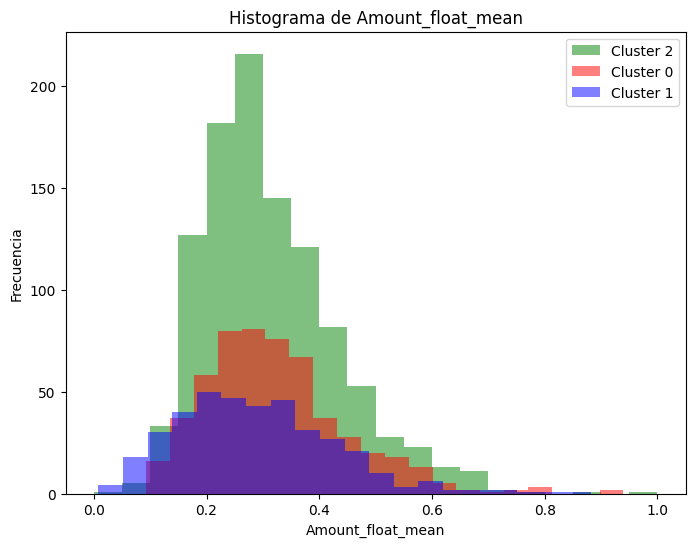

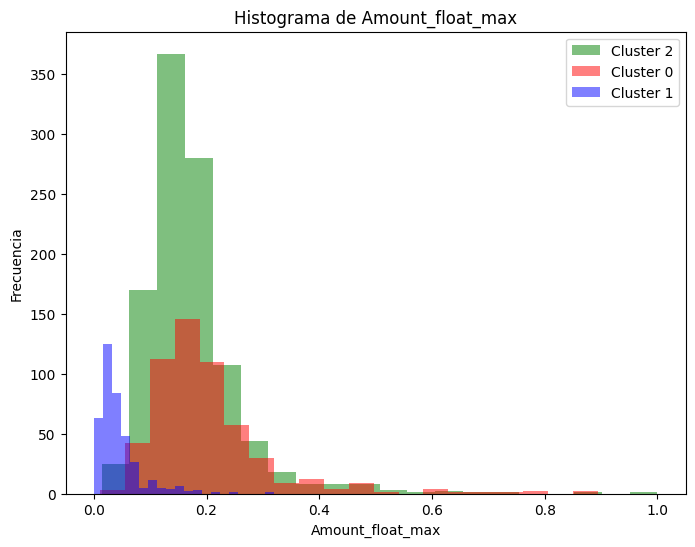

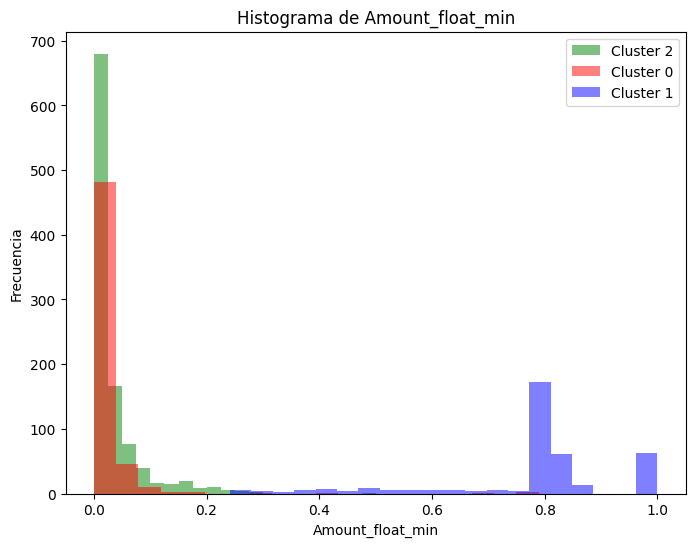

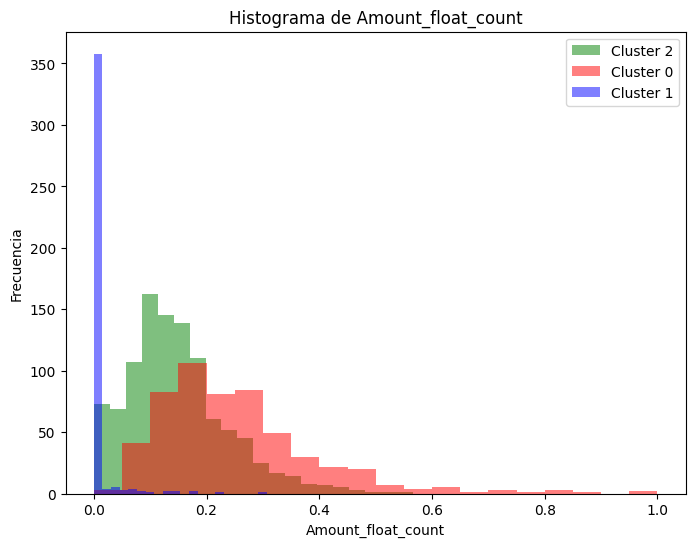

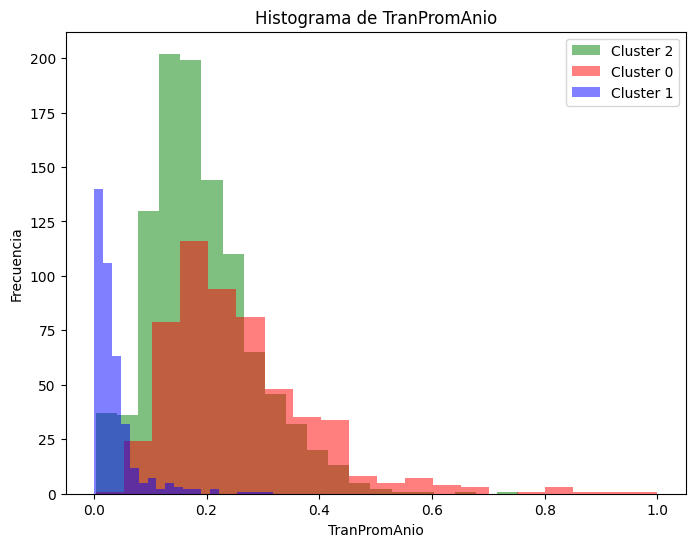

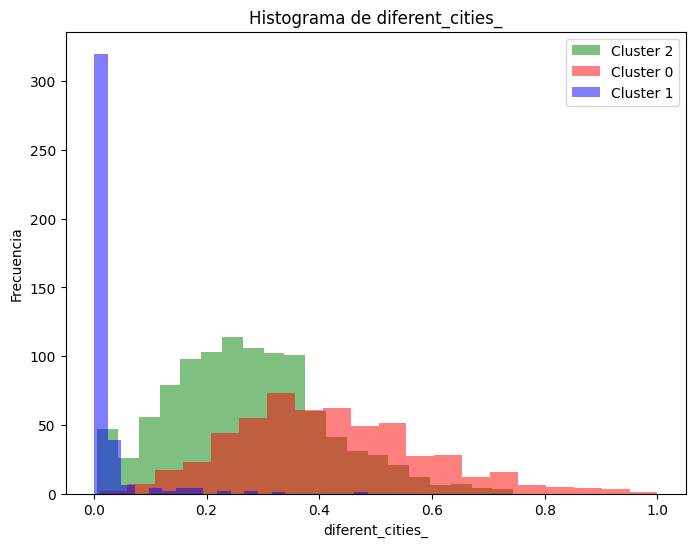

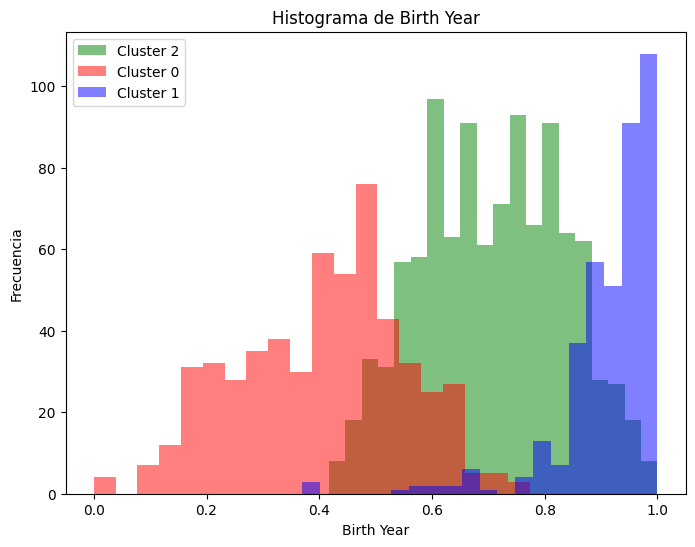

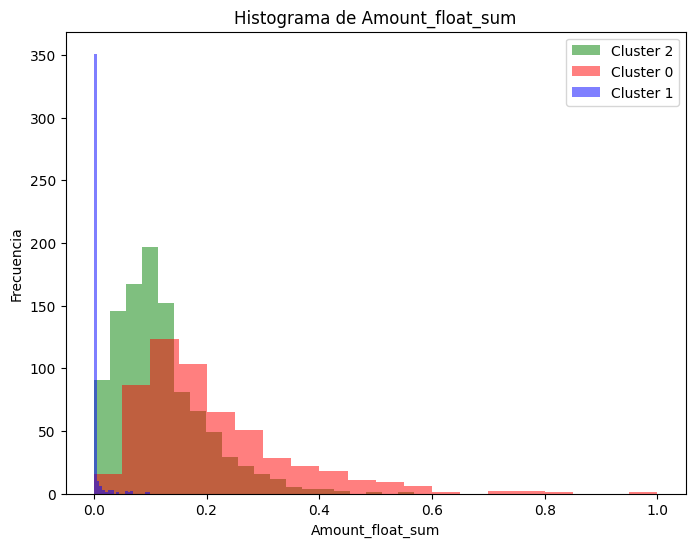

In [81]:
unique_clusters = Xmds_sample['kmeans_negocio_3'].unique()

# Color mapping para kmeans_mds_3
color_mapping = {0: 'red', 1: 'blue', 2: 'green'}

# Itera a través de las variables en ls_best
for variable in ls_best:
    # Crear un nuevo histograma para la variable actual
    plt.figure(figsize=(8, 6))  # Establece el tamaño de la figura (opcional)
    
    # Itera a través de los valores únicos de kmeans_mds_3
    for cluster_value in unique_clusters:
        # Restablece el índice del DataFrame Xmm_sample antes de la selección
        subset_data = Xmm_negocio.reset_index(drop=True)[Xmds_sample['kmeans_negocio_3'] == cluster_value][variable]
        
        # Crea el histograma utilizando solo un color para este conjunto de datos
        plt.hist(subset_data, bins=20, color=color_mapping[cluster_value], alpha=0.5, label=f'Cluster {cluster_value}')
    
    # Configura el título y etiquetas de los ejes
    plt.title(f'Histograma de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    
    # Agrega una leyenda para identificar los clusters
    plt.legend()
    
    # Muestra la gráfica
    plt.show()

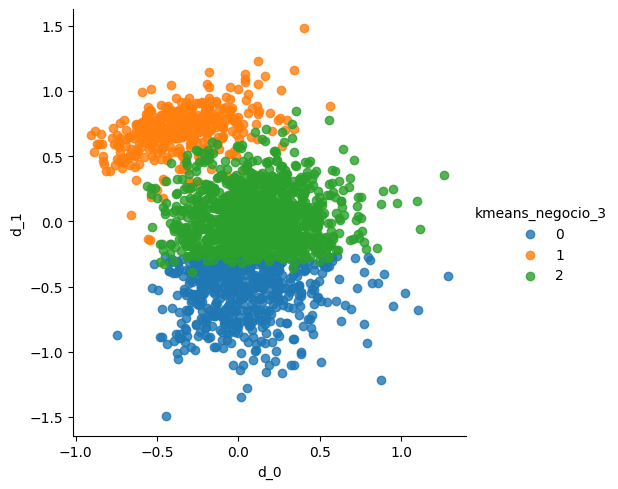

In [82]:
sns.lmplot(data=Xmds_sample, x='d_0', y='d_1', fit_reg=False, hue='kmeans_negocio_3')

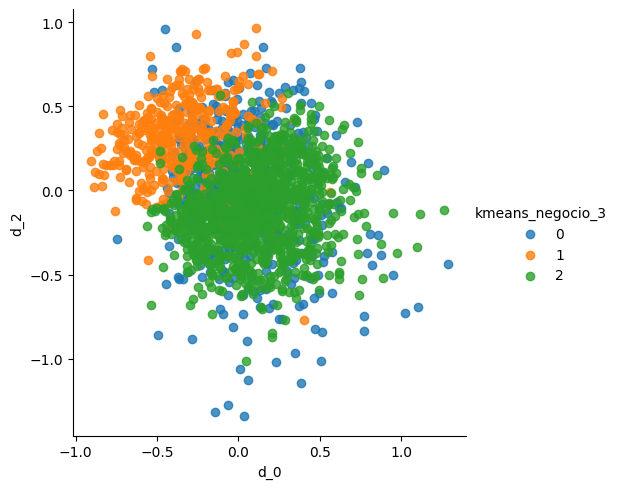

In [83]:
sns.lmplot(data=Xmds_sample, x='d_0', y='d_2', fit_reg=False, hue='kmeans_negocio_3')

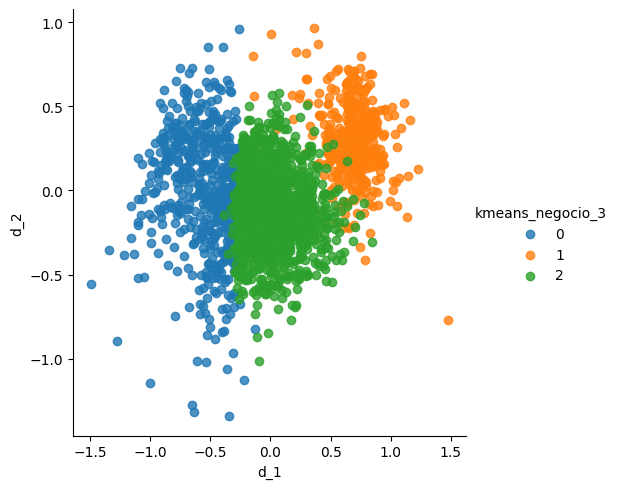

In [84]:
sns.lmplot(data=Xmds_sample, x='d_1', y='d_2', fit_reg=False, hue='kmeans_negocio_3')

In [85]:
sc = StandardScaler()
Xsc = pd.DataFrame(sc.fit_transform(df2[ls_best]), columns=ls_best)

In [86]:
from sklearn.mixture import GaussianMixture
n_clusters = 3
gmm = GaussianMixture(n_clusters)
gmm.fit(Xsc) # Tiene que ser el Estandarizado, porque recordemos que el supuesto inicia con Gaussianas
predictions = gmm.predict(Xsc)
Xmds_sample['cl_gmm'] = predictions

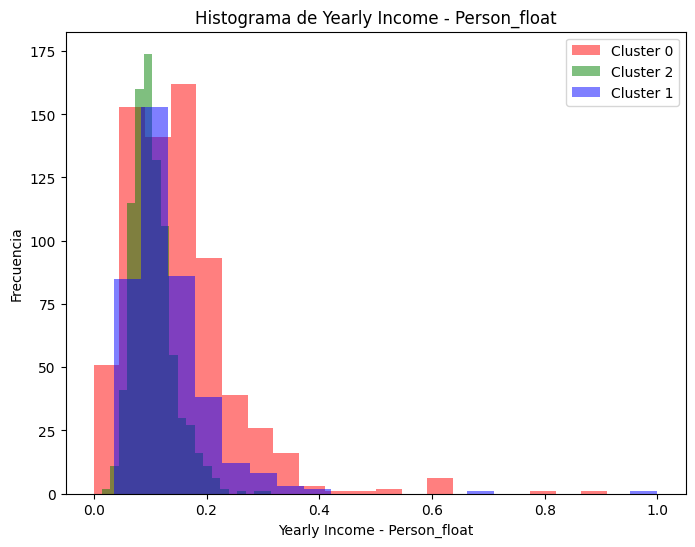

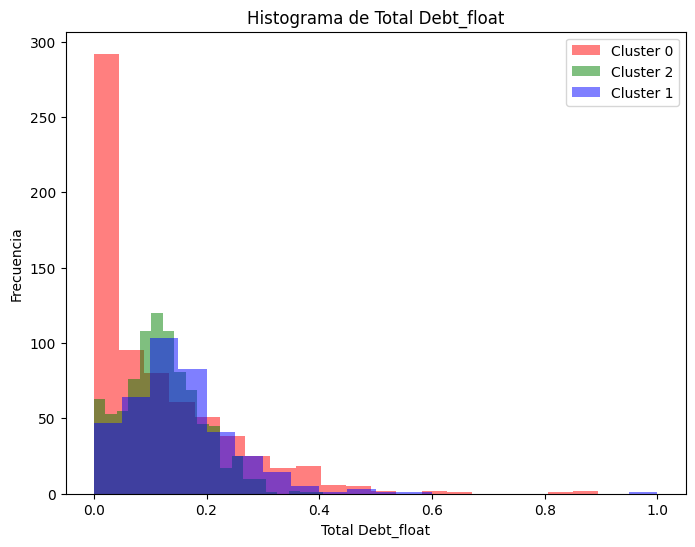

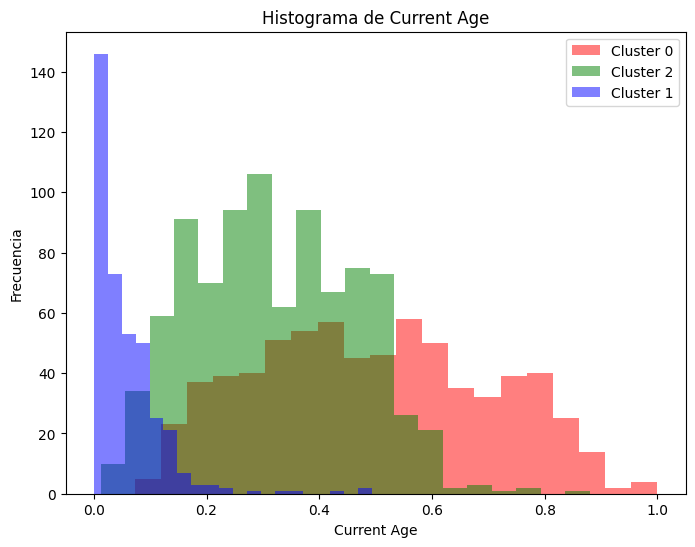

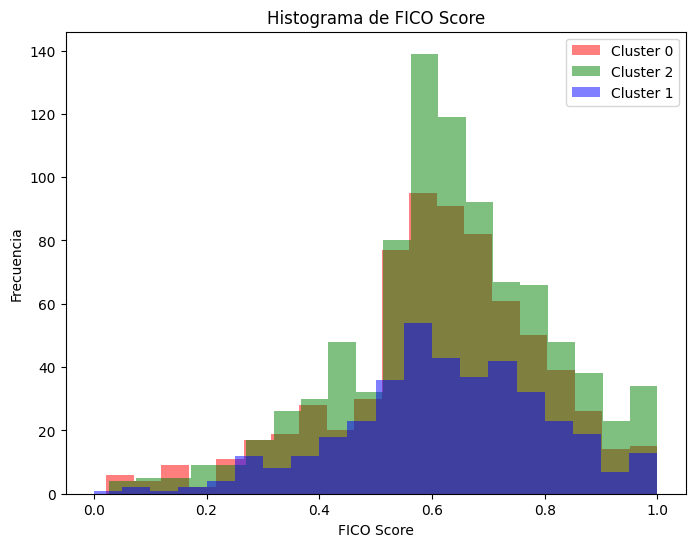

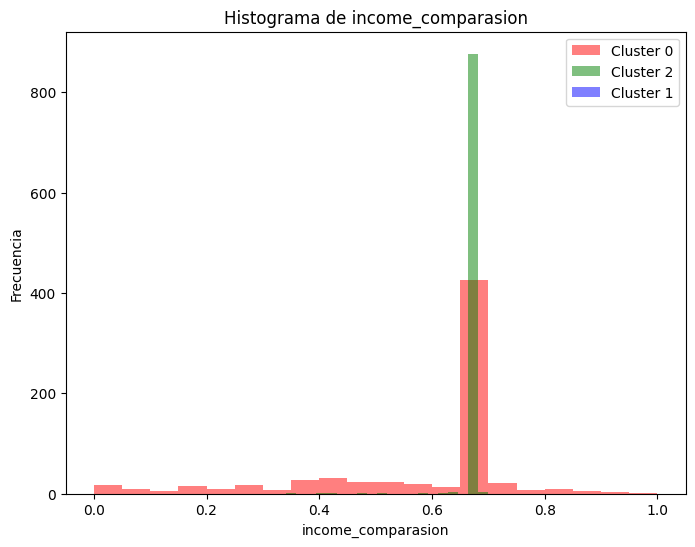

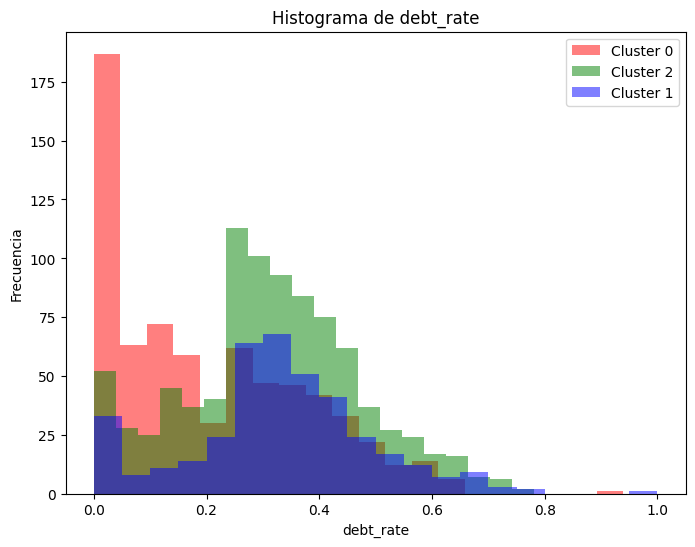

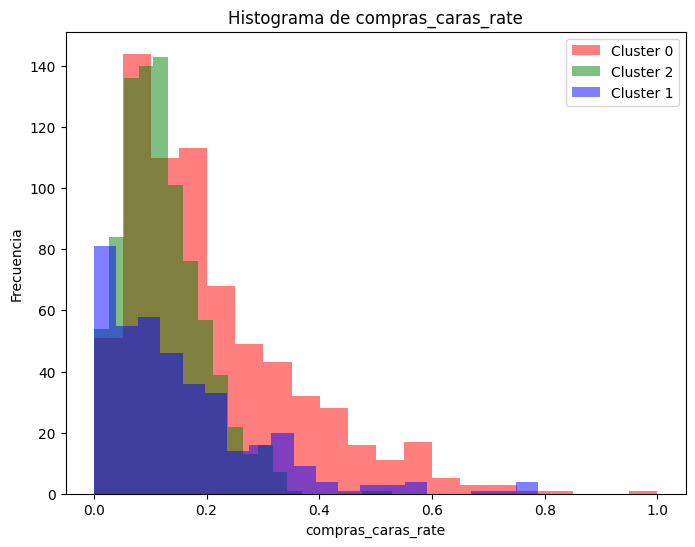

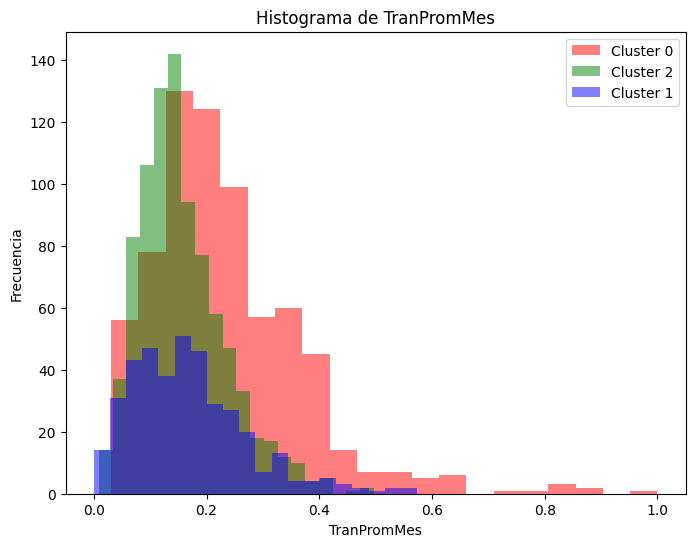

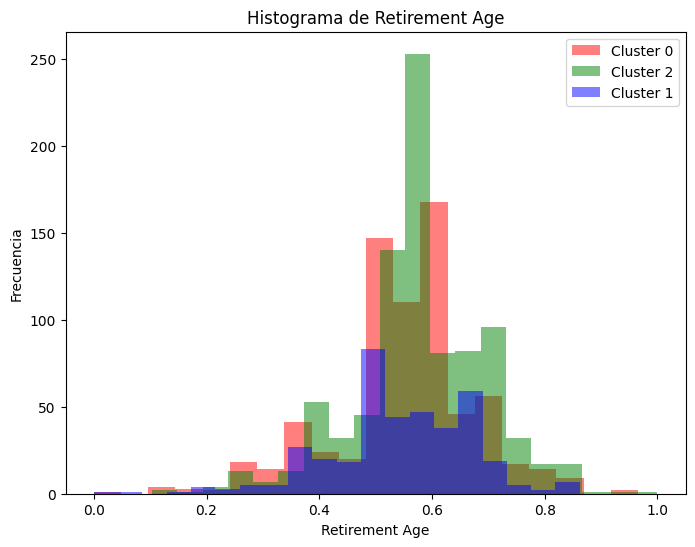

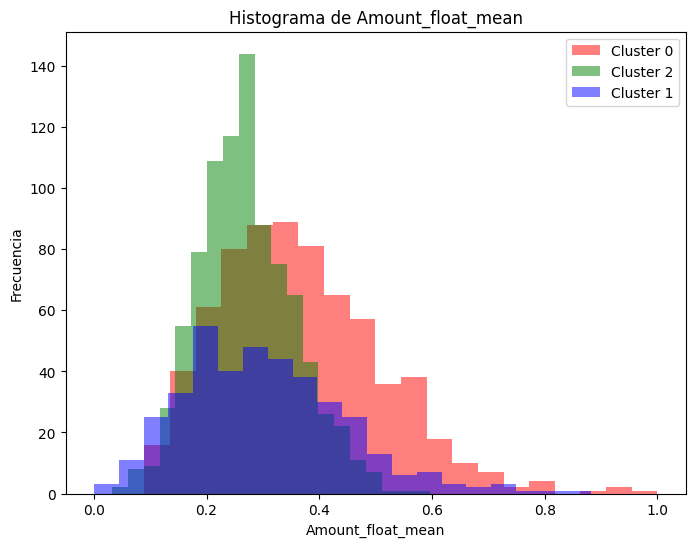

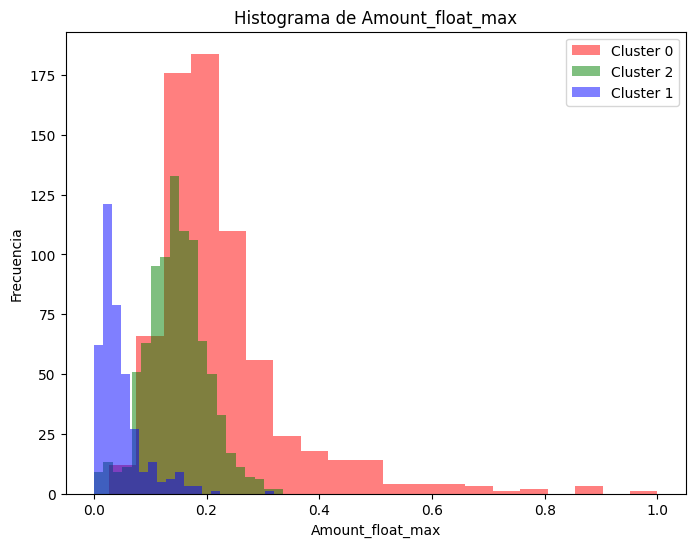

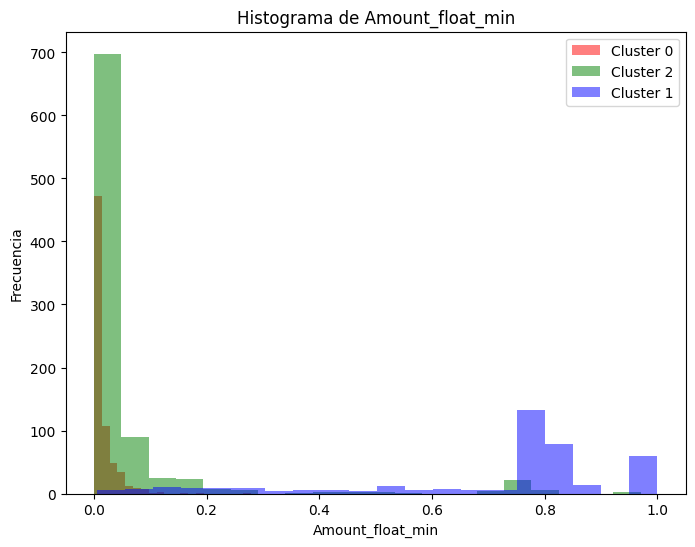

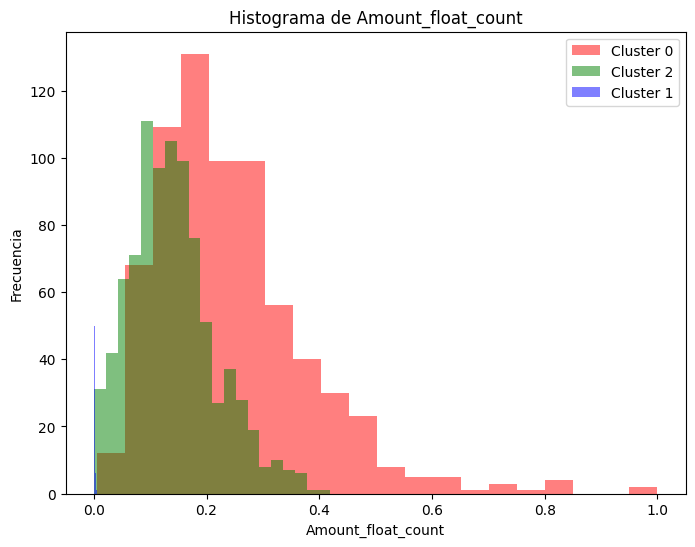

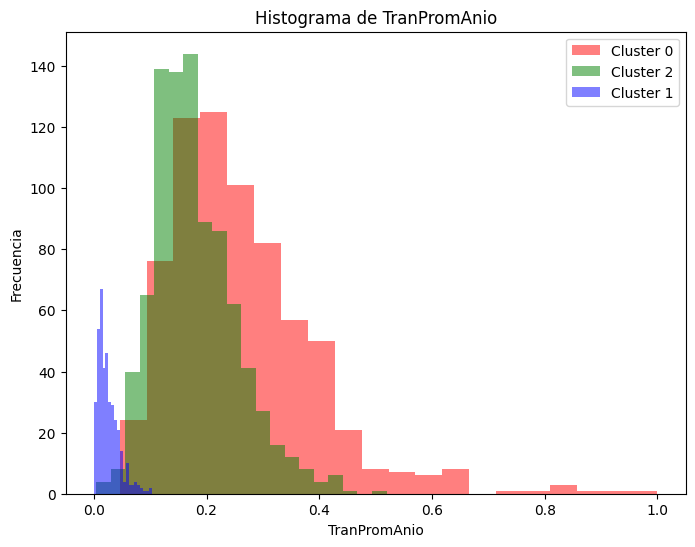

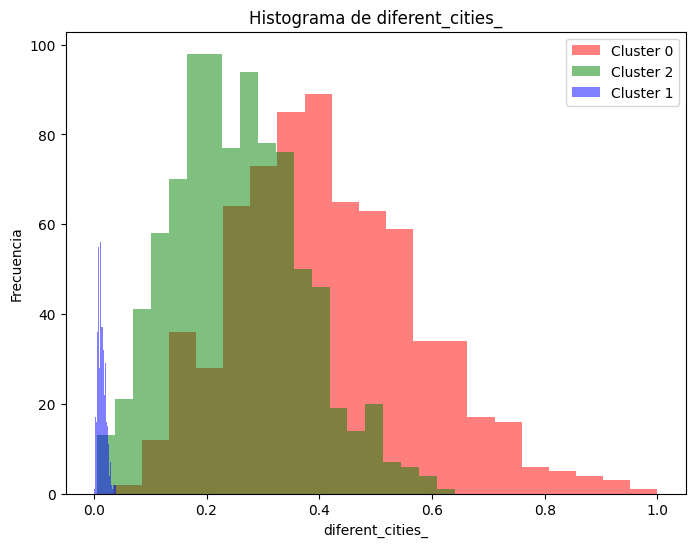

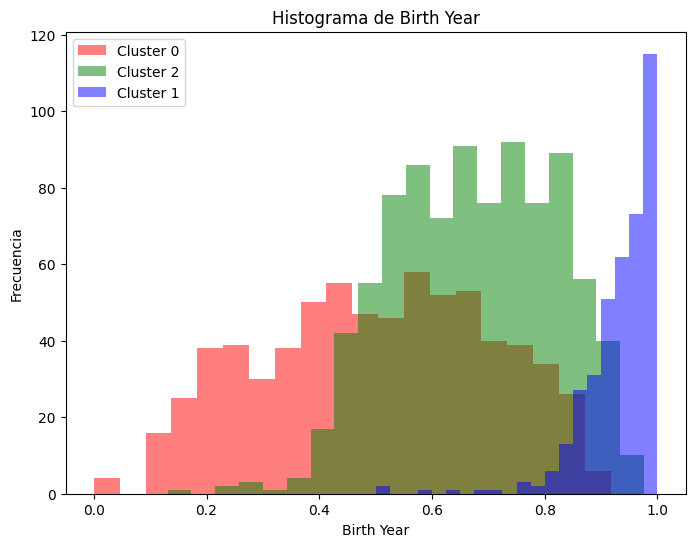

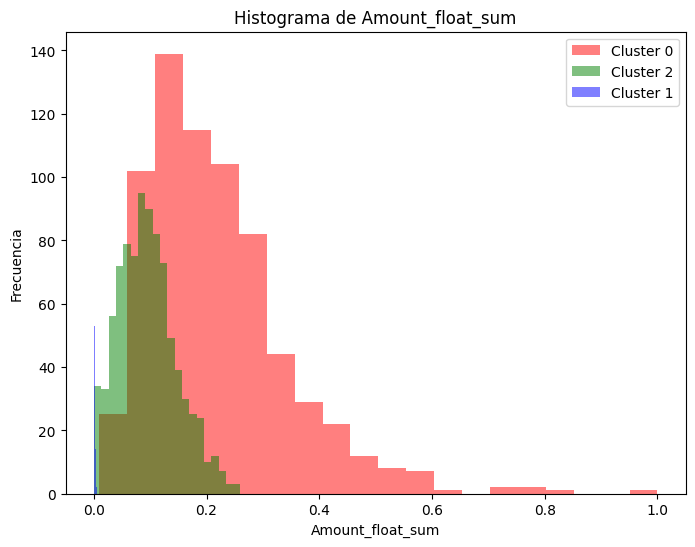

In [89]:
unique_clusters = Xmds_sample['cl_gmm'].unique()

# Color mapping para kmeans_mds_3
color_mapping = {0: 'red', 1: 'blue', 2: 'green'}

# Itera a través de las variables en ls_best
for variable in ls_best:
    # Crear un nuevo histograma para la variable actual
    plt.figure(figsize=(8, 6))  # Establece el tamaño de la figura (opcional)
    
    # Itera a través de los valores únicos de kmeans_mds_3
    for cluster_value in unique_clusters:
        # Restablece el índice del DataFrame Xmm_sample antes de la selección
        subset_data = Xmm_negocio.reset_index(drop=True)[Xmds_sample['cl_gmm'] == cluster_value][variable]
        
        # Crea el histograma utilizando solo un color para este conjunto de datos
        plt.hist(subset_data, bins=20, color=color_mapping[cluster_value], alpha=0.5, label=f'Cluster {cluster_value}')
    
    # Configura el título y etiquetas de los ejes
    plt.title(f'Histograma de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    
    # Agrega una leyenda para identificar los clusters
    plt.legend()
    
    # Muestra la gráfica
    plt.show()

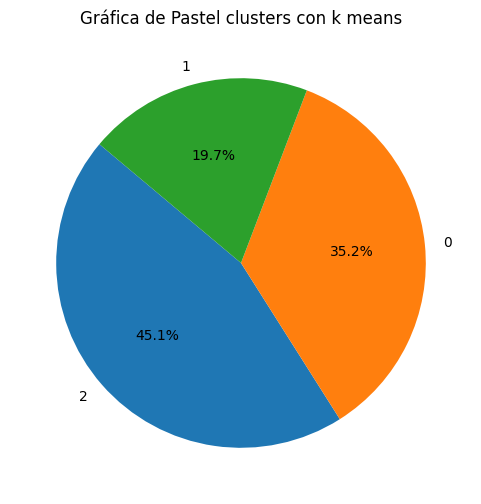

In [90]:
conteo_clusters = Xmds_sample['cl_gmm'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(conteo_clusters, labels=conteo_clusters.index, autopct='%1.1f%%', startangle=140)
plt.title('Gráfica de Pastel clusters con k means')
plt.show()

In [92]:
df2['cl_gmm']=Xmds_sample['cl_gmm']
df2.to_csv('df2_v2.csv')

In [ ]:

seleccion_=['Yearly Income - Person_float','Current Age','compras_caras_rate','Amount_float_mean','Amount_float_max','Amount_float_count',
           'TranPromAnio','diferent_cities_','Amount_float_sum']
df2.loc[:, ['cl_gmm']+seleccion_].groupby('cl_gmm').mean().to_csv('tabla_medias.csv')

In [ ]:
df2.loc[:, ['cl_gmm']+seleccion_].groupby('cl_gmm').mean()

In [ ]:
%%time
grp = 'cl_gmm'
for c_ in Xmm_negocio.columns:
    print(c_)
    tukey = pairwise_tukeyhsd(
        endog=Xmm_negocio[c_],
        groups=Xmds_sample[grp],
        alpha=0.05
        )
    print(tukey)

In [ ]:
tad.loc[:, ['cl_gmm']+seleccion_].groupby('gm').mean()

In [ ]:
# cuaro clusters
# modelando solo con las vartiables que nos intersan
# modelacion Kmeans
# K-Means (k=3) por visaulización:


kmeans_mds_3 = KMeans(4)
kmeans_mds_3.fit(Xmm_negocio)

predictions = kmeans_mds_3.fit_predict(Xmm_negocio)
Xmds_sample['kmeans_negocio_4'] = predictions

In [ ]:
unique_clusters = Xmds_sample['kmeans_negocio_4'].unique()

# Color mapping para kmeans_mds_3
color_mapping = {0: 'red', 1: 'blue', 2: 'green',3:'black'}

# Itera a través de las variables en ls_best
for variable in ls_best:
    # Crear un nuevo histograma para la variable actual
    plt.figure(figsize=(8, 6))  # Establece el tamaño de la figura (opcional)
    
    # Itera a través de los valores únicos de kmeans_mds_3
    for cluster_value in unique_clusters:
        # Restablece el índice del DataFrame Xmm_sample antes de la selección
        subset_data = Xmm_negocio.reset_index(drop=True)[Xmds_sample['kmeans_negocio_4'] == cluster_value][variable]
        
        # Crea el histograma utilizando solo un color para este conjunto de datos
        plt.hist(subset_data, bins=20, color=color_mapping[cluster_value], alpha=0.5, label=f'Cluster {cluster_value}')
    
    # Configura el título y etiquetas de los ejes
    plt.title(f'Histograma de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    
    # Agrega una leyenda para identificar los clusters
    plt.legend()
    
    # Muestra la gráfica
    plt.show()

In [ ]:
sns.lmplot(data=Xmds_sample, x='d_0', y='d_1', fit_reg=False, hue='kmeans_negocio_4')

In [ ]:
sns.lmplot(data=Xmds_sample, x='d_1', y='d_2', fit_reg=False, hue='kmeans_negocio_4')

In [ ]:
sns.lmplot(data=Xmds_sample, x='d_0', y='d_2', fit_reg=False, hue='kmeans_negocio_4')